# DESEq2 for DA peaks per cell type on peaks called by refined annotation

## Load packages from new environment

In [1]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"))
.libPaths()
# sessionInfo()
Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/bin/python")

suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(dplyr)) 
suppressMessages(library(ggplot2)) 
suppressMessages(library(Matrix)) 
suppressMessages(library(data.table)) 
suppressMessages(library(ggpubr)) 
suppressMessages(library(ggplot2))
suppressMessages(library(pheatmap))
suppressMessages(library(presto))
suppressMessages(library("qlcMatrix"))
suppressMessages(library("cowplot"))
suppressMessages(library("RColorBrewer"))
suppressMessages(library("plyr"))
suppressMessages(library("forcats"))
suppressMessages(library('ggeasy'))
suppressMessages(library('dplyr'))
suppressMessages(library("svglite"))
suppressMessages(library("ape"))
suppressMessages(library("ggforce"))
suppressMessages(library("tidyr"))
suppressMessages(library("edgeR"))
suppressMessages(library("apeglm"))
suppressMessages(library("DESeq2"))
suppressMessages(library("tibble")) 
suppressMessages(library("ggrepel"))

[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"                     
[2] "/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"

Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘SeuratObject’ was built under R version 4.3.3”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘Matrix’ was built under R version 4.3.3”
Warning message:
“package ‘qlcMatrix’ was built under R version 4.3.3”
Warning message:
“package ‘slam’ was built under R version 4.3.3”
Warning message:
“package ‘sparsesvd’ was built under R version 4.3.3”
Warning message:
“package ‘ggeasy’ was built under R version 4.3.3”
Warning message:
“package ‘svglite’ was built under R version 4.3.3”
Warning message:
“package ‘ape’ was built under R version 4.3.3”
Warning message:
“package ‘ggforce’ was built under R version 4.3.3”
Warning message:
“package ‘edgeR’ was built under R version 4.3.3”
Warning message:
“package ‘limma’ was built under R version 4.3.3”
Warning message:
“package ‘apeglm’ was built under R version 4.3.3”
Warning message:
“package ‘DESeq2’ was bu

# Read Seurat object after new peak calling

In [2]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

In [3]:
adata<-readRDS(file="merged_clusters_after_genotyping_after_refined_annotation_new_peaks.rds")


In [4]:
adata


An object of class Seurat 
749604 features across 16835 samples within 5 assays 
Active assay: ATAC (340606 features, 340606 variable features)
 2 layers present: counts, data
 4 other assays present: RNA, RNA_raw, SCT, ATAC_by_refined_annotation
 7 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn, harmony.rna, harmony.atac

In [5]:
colnames(adata@meta.data)

[1] "orig.ident"                         
  [2] "nCount_RNA"                         
  [3] "nFeature_RNA"                       
  [4] "percent.mt"                         
  [5] "nCount_RNA_raw"                     
  [6] "nFeature_RNA_raw"                   
  [7] "nCount_ATAC"                        
  [8] "nFeature_ATAC"                      
  [9] "gex_raw_reads"                      
 [10] "gex_mapped_reads"                   
 [11] "gex_conf_intergenic_reads"          
 [12] "gex_conf_exonic_reads"              
 [13] "gex_conf_intronic_reads"            
 [14] "gex_conf_exonic_unique_reads"       
 [15] "gex_conf_exonic_antisense_reads"    
 [16] "gex_conf_exonic_dup_reads"          
 [17] "gex_exonic_umis"                    
 [18] "gex_conf_intronic_unique_reads"     
 [19] "gex_conf_intronic_antisense_reads"  
 [20] "gex_conf_intronic_dup_reads"        
 [21] "gex_intronic_umis"                  
 [22] "gex_conf_txomic_unique_reads"       
 [23] "gex_umis_count"                     
 [24] "gex_genes_count"                    
 [25] "atac_raw_reads"                     
 [26] "atac_unmapped_reads"                
 [27] "atac_lowmapq"                       
 [28] "atac_dup_reads"                     
 [29] "atac_chimeric_reads"                
 [30] "atac_mitochondrial_reads"           
 [31] "atac_fragments"                     
 [32] "atac_TSS_fragments"                 
 [33] "atac_peak_region_fragments"         
 [34] "atac_peak_region_cutsites"          
 [35] "TSS.enrichment"                     
 [36] "TSS.percentile"                     
 [37] "scDblFinder.class"                  
 [38] "scDblFinder.score"                  
 [39] "scDblFinder.weighted"               
 [40] "scDblFinder.cxds_score"             
 [41] "scDblFinder.class_atac"             
 [42] "scDblFinder.score_atac"             
 [43] "scDblFinder.weighted_atac"          
 [44] "scDblFinder.cxds_score_atac"        
 [45] "No_assigned_GFPbc"                  
 [46] "Assigned_GFPbc"                     
 [47] "Assigned_GFPgenotype"               
 [48] "DBL_comb"                           
 [49] "amulet_nFrags"                      
 [50] "amulet_uniqFrags"                   
 [51] "amulet_nAbove2"                     
 [52] "amulet_total.nAbove2"               
 [53] "amulet_p.value"                     
 [54] "amulet_q.value"                     
 [55] "doublet_amulet"                     
 [56] "nCount_SCT"                         
 [57] "nFeature_SCT"                       
 [58] "SCT.weight"                         
 [59] "ATAC.weight"                        
 [60] "wsnn_res.0.2"                       
 [61] "seurat_clusters"                    
 [62] "doublet"                            
 [63] "wsnn_res.2"                         
 [64] "wsnn_res.0.5"                       
 [65] "wsnn_res.0.25"                      
 [66] "CellTypist_BMA_label"               
 [67] "CellTypist_BMA_conf_score"          
 [68] "CellTypist_IPSCs_label"             
 [69] "CellTypist_IPSCs_conf_score"        
 [70] "CellTypist_BMA_label_filtered"      
 [71] "CellTypist_IPSCs_label_filtered"    
 [72] "time_point"                         
 [73] "time"                               
 [74] "nucleosome_signal"                  
 [75] "nucleosome_percentile"              
 [76] "FRiP"                               
 [77] "atac_pct_reads_in_peaks"            
 [78] "my_anot"                            
 [79] "FOI"                                
 [80] "my_anot_updated"                    
 [81] "majority_voting_BMA"                
 [82] "majority_voting_iPSCs"              
 [83] "current_anot"                       
 [84] "Assignation_demux_NO_CB"            
 [85] "Assigned_GFPbc_demux_NO_CB"         
 [86] "Assignation_demux_CB"               
 [87] "Assigned_GFPbc_demux_CB"            
 [88] "Assigned_GFPbc_integral"            
 [89] "Assigned_GFPgenotype_integral"      
 [90] "Subclusters_3"                      
 [91] "Subclusters_4"                     

In [6]:
DefaultAssay(adata)<-'ATAC_by_refined_annotation'

In [7]:
peaks<-Features(adata)

str(peaks)

 chr [1:306646] "chr1-10052-10333" "chr1-180682-181613" ...


In [8]:
DefaultAssay(adata)<-'ATAC'

In [9]:
peaks_2<-Features(adata)

str(peaks_2)

 chr [1:340606] "chr1-10076-10321" "chr1-180715-181606" ...


In [10]:
overlap<-which(peaks%in%peaks_2)

str(overlap)

 int [1:170] 799 2328 2812 2999 5145 6146 8473 10784 11096 15687 ...


## Read Linked Peaks

In [11]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

In [58]:
Linked_peaks<-readRDS(file="Linked_peak_to_selected_genes.rds")

colnames(Linked_peaks)[which(colnames(Linked_peaks)%in%c('zscore','pvalue','Minus_logpval'))]<-paste('Link_',colnames(Linked_peaks)[which(colnames(Linked_peaks)%in%c('zscore','pvalue','Minus_logpval'))], sep='')

str(Linked_peaks)

'data.frame':	3381 obs. of  11 variables:
 $ seqnames          : Factor w/ 23 levels "chr1","chr2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start             : int  43953185 44036259 44047943 44068348 44119766 44261567 44405194 44405194 44405194 44405194 ...
 $ end               : int  44405194 44405194 44405194 44405194 44405194 44405194 44406511 44408863 44417807 44501134 ...
 $ width             : int  452010 368936 357252 336847 285429 143628 1318 3670 12614 95941 ...
 $ strand            : Factor w/ 3 levels "+","-","*": 3 3 3 3 3 3 3 3 3 3 ...
 $ score             : num  0.1766 -0.0797 -0.081 -0.076 0.0883 ...
 $ gene              : chr  "RNF220" "RNF220" "RNF220" "RNF220" ...
 $ Peak_ID           : chr  "chr1-43952784-43953586" "chr1-44035644-44036873" "chr1-44047364-44048521" "chr1-44067727-44068969" ...
 $ Link_zscore       : num  2.59 -1.93 -1.94 -1.68 1.65 ...
 $ Link_pvalue       : num  0.00482 0.02681 0.02591 0.04608 0.04993 ...
 $ Link_Minus_logpval: num  2.32 1.57 1.59 1.34 1.3 1.

In [60]:
check<-Linked_peaks[which(Linked_peaks$Link_Minus_logpval >= 1.3),]

str(check)

'data.frame':	3381 obs. of  11 variables:
 $ seqnames          : Factor w/ 23 levels "chr1","chr2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start             : int  43953185 44036259 44047943 44068348 44119766 44261567 44405194 44405194 44405194 44405194 ...
 $ end               : int  44405194 44405194 44405194 44405194 44405194 44405194 44406511 44408863 44417807 44501134 ...
 $ width             : int  452010 368936 357252 336847 285429 143628 1318 3670 12614 95941 ...
 $ strand            : Factor w/ 3 levels "+","-","*": 3 3 3 3 3 3 3 3 3 3 ...
 $ score             : num  0.1766 -0.0797 -0.081 -0.076 0.0883 ...
 $ gene              : chr  "RNF220" "RNF220" "RNF220" "RNF220" ...
 $ Peak_ID           : chr  "chr1-43952784-43953586" "chr1-44035644-44036873" "chr1-44047364-44048521" "chr1-44067727-44068969" ...
 $ Link_zscore       : num  2.59 -1.93 -1.94 -1.68 1.65 ...
 $ Link_pvalue       : num  0.00482 0.02681 0.02591 0.04608 0.04993 ...
 $ Link_Minus_logpval: num  2.32 1.57 1.59 1.34 1.3 1.

## Subset on linked peaks

In [15]:
DefaultAssay(adata)<-'ATAC_by_refined_annotation'

peaks <- GetAssayData(adata,slot="counts")

str(peaks)
cat("\n")


Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”


Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:127181661] 4 6 47 109 118 121 140 156 284 462 ...
  ..@ p       : int [1:16836] 0 3988 11246 19585 35689 49122 64522 74021 91777 95828 ...
  ..@ Dim     : int [1:2] 306646 16835
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:306646] "chr1-10052-10333" "chr1-180682-181613" "chr1-191201-191943" "chr1-267869-268076" ...
  .. ..$ : chr [1:16835] "MCO_01326_AAACAGCCACAGCCAT-1" "MCO_01326_AAACAGCCAGGAAGCC-1" "MCO_01326_AAACAGCCAGTATGTT-1" "MCO_01326_AAACATGCAAACGCGA-1" ...
  .. .. ..- attr(*, ".match.hash")=Class 'match.hash' <externalptr> 
  ..@ x       : num [1:127181661] 1 3 1 1 1 1 1 1 1 1 ...
  ..@ factors : list()



In [16]:
Peak_list=data.frame(rownames(peaks))
Peak_list$peak_ids=Peak_list$rownames.peaks.

str(Peak_list)
cat("\n")

'data.frame':	306646 obs. of  2 variables:
 $ rownames.peaks.: chr  "chr1-10052-10333" "chr1-180682-181613" "chr1-191201-191943" "chr1-267869-268076" ...
 $ peak_ids       : chr  "chr1-10052-10333" "chr1-180682-181613" "chr1-191201-191943" "chr1-267869-268076" ...



In [17]:
Peak_list_filt=Peak_list %>% dplyr::filter(peak_ids %in% Linked_peaks$Peak_ID)
  
  cat("Peak_list_filt_0\n")
  cat(str(Peak_list_filt))
  cat("\n")

Peak_list_filt_0
'data.frame':	3229 obs. of  2 variables:
 $ rownames.peaks.: chr  "chr1-43952784-43953586" "chr1-44035644-44036873" "chr1-44047364-44048521" "chr1-44067727-44068969" ...
 $ peak_ids       : chr  "chr1-43952784-43953586" "chr1-44035644-44036873" "chr1-44047364-44048521" "chr1-44067727-44068969" ...



In [18]:
peak_subset = peaks[Peak_list_filt$peak_ids,]
  
cat("peak_subset_0\n")
cat(str(peak_subset))
cat("\n")

peak_subset_0
Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:3810661] 20 30 32 36 62 101 108 118 133 140 ...
  ..@ p       : int [1:16836] 0 119 356 633 1147 1560 2011 2320 2881 2991 ...
  ..@ Dim     : int [1:2] 3229 16835
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:3229] "chr1-43952784-43953586" "chr1-44035644-44036873" "chr1-44047364-44048521" "chr1-44067727-44068969" ...
  .. ..$ : chr [1:16835] "MCO_01326_AAACAGCCACAGCCAT-1" "MCO_01326_AAACAGCCAGGAAGCC-1" "MCO_01326_AAACAGCCAGTATGTT-1" "MCO_01326_AAACATGCAAACGCGA-1" ...
  .. .. ..- attr(*, ".match.hash")=Class 'match.hash' <externalptr> 
  ..@ x       : num [1:3810661] 1 2 1 1 1 1 1 1 1 1 ...
  ..@ factors : list()



In [20]:
adata[["peak_subset"]] <- CreateChromatinAssay(
counts = peak_subset,
fragments = Fragments(adata),
min.cells = 0, min.features = -1 )

DefaultAssay(adata) <- 'peak_subset'

In [163]:
adata

An object of class Seurat 
752833 features across 16835 samples within 6 assays 
Active assay: peak_subset (3229 features, 0 variable features)
 2 layers present: counts, data
 5 other assays present: RNA, RNA_raw, SCT, ATAC, ATAC_by_refined_annotation
 7 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn, harmony.rna, harmony.atac

## Create a variable to correct for clone line and time_point

In [164]:
 adata$sample_id<-droplevels(interaction(adata$clone_line,adata$time_point, sep="_"))
  
cat(sprintf(as.character(names(summary(adata$sample_id)))))
cat("\n")
cat(sprintf(as.character(summary(adata$sample_id))))
cat("\n")

wt_1_Day_0 wt_2_Day_0 wt_3_Day_0 rs62237617_1_Day_0 rs62237617_2_Day_0 rs62237617_3_Day_0 DNMT3A_1_Day_0 DNMT3A_2_Day_0 DNMT3A_3_Day_0 rs62237617_DNMT3A_1_Day_0 rs62237617_DNMT3A_2_Day_0 rs62237617_DNMT3A_3_Day_0 wt_1_Day_8 wt_2_Day_8 wt_3_Day_8 rs62237617_1_Day_8 rs62237617_2_Day_8 rs62237617_3_Day_8 DNMT3A_1_Day_8 DNMT3A_2_Day_8 DNMT3A_3_Day_8 rs62237617_DNMT3A_1_Day_8 rs62237617_DNMT3A_2_Day_8 rs62237617_DNMT3A_3_Day_8 wt_1_Day_12 wt_2_Day_12 wt_3_Day_12 rs62237617_1_Day_12 rs62237617_2_Day_12 rs62237617_3_Day_12 DNMT3A_1_Day_12 DNMT3A_2_Day_12 DNMT3A_3_Day_12 rs62237617_DNMT3A_1_Day_12 rs62237617_DNMT3A_2_Day_12 rs62237617_DNMT3A_3_Day_12 wt_1_Day_15 wt_2_Day_15 wt_3_Day_15 rs62237617_1_Day_15 rs62237617_2_Day_15 rs62237617_3_Day_15 DNMT3A_1_Day_15 DNMT3A_2_Day_15 DNMT3A_3_Day_15 rs62237617_DNMT3A_1_Day_15 rs62237617_DNMT3A_2_Day_15 rs62237617_DNMT3A_3_Day_15
60 132 80 130 119 242 893 98 2277 506 600 715 6 29 18 9 11 30 68 9 24 19 11 25 58 33 113 348 319 3134 77 13 35 618 65 92 6 3

## Extract peak_subset counts

In [165]:
matrix_ATAC<-GetAssayData(object = adata, assay = "peak_subset", layer = "counts")
  
  cat("matrix_ATAC\n")
  cat(str(matrix_ATAC))
  cat("\n")

matrix_ATAC
Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:3810661] 20 30 32 36 62 101 108 118 133 140 ...
  ..@ p       : int [1:16836] 0 119 356 633 1147 1560 2011 2320 2881 2991 ...
  ..@ Dim     : int [1:2] 3229 16835
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:3229] "chr1-43952784-43953586" "chr1-44035644-44036873" "chr1-44047364-44048521" "chr1-44067727-44068969" ...
  .. ..$ : chr [1:16835] "MCO_01326_AAACAGCCACAGCCAT-1" "MCO_01326_AAACAGCCAGGAAGCC-1" "MCO_01326_AAACAGCCAGTATGTT-1" "MCO_01326_AAACATGCAAACGCGA-1" ...
  ..@ x       : num [1:3810661] 1 2 1 1 1 1 1 1 1 1 ...
  ..@ factors : list()



## Extract metadata

In [166]:
metadata<-adata[[]]

cat(sprintf(as.character(names(summary(metadata$time_point)))))
  cat("\n")
  cat(sprintf(as.character(summary(metadata$time_point))))
  cat("\n")
  
  
  cat(sprintf(as.character(names(summary(metadata$refined_annotation_majority_vote)))))
  cat("\n")
  cat(sprintf(as.character(summary(metadata$refined_annotation_majority_vote))))
  cat("\n")


  
  cat(sprintf(as.character(names(summary(as.factor(metadata$clone_line))))))
  cat("\n")
  cat(sprintf(as.character(summary(as.factor(metadata$clone_line)))))
  cat("\n")
  
  cat(sprintf(as.character(names(summary(as.factor(metadata$sample_id))))))
  cat("\n")
  cat(sprintf(as.character(summary(as.factor(metadata$sample_id)))))
  cat("\n")

Day_0 Day_8 Day_12 Day_15
5852 259 4905 5819
hESC HemogenicEndothelium MEP early erythroid early MK MK PolyPlo MK
5853 236 2693 914 108 2863 4168
wt_1 wt_2 wt_3 rs62237617_1 rs62237617_2 rs62237617_3 DNMT3A_1 DNMT3A_2 DNMT3A_3 rs62237617_DNMT3A_1 rs62237617_DNMT3A_2 rs62237617_DNMT3A_3
130 226 305 872 776 7996 1101 123 2355 1381 706 864
wt_1_Day_0 wt_2_Day_0 wt_3_Day_0 rs62237617_1_Day_0 rs62237617_2_Day_0 rs62237617_3_Day_0 DNMT3A_1_Day_0 DNMT3A_2_Day_0 DNMT3A_3_Day_0 rs62237617_DNMT3A_1_Day_0 rs62237617_DNMT3A_2_Day_0 rs62237617_DNMT3A_3_Day_0 wt_1_Day_8 wt_2_Day_8 wt_3_Day_8 rs62237617_1_Day_8 rs62237617_2_Day_8 rs62237617_3_Day_8 DNMT3A_1_Day_8 DNMT3A_2_Day_8 DNMT3A_3_Day_8 rs62237617_DNMT3A_1_Day_8 rs62237617_DNMT3A_2_Day_8 rs62237617_DNMT3A_3_Day_8 wt_1_Day_12 wt_2_Day_12 wt_3_Day_12 rs62237617_1_Day_12 rs62237617_2_Day_12 rs62237617_3_Day_12 DNMT3A_1_Day_12 DNMT3A_2_Day_12 DNMT3A_3_Day_12 rs62237617_DNMT3A_1_Day_12 rs62237617_DNMT3A_2_Day_12 rs62237617_DNMT3A_3_Day_12 wt_1_Day_1

## Create a new Seurat object with the ATAC and the metadata

In [167]:
ATAC_object <- CreateSeuratObject(counts = matrix_ATAC, assay = "RNA",
                                   meta.data=metadata)

ATAC_object

An object of class Seurat 
3229 features across 16835 samples within 1 assay 
Active assay: RNA (3229 features, 0 variable features)
 1 layer present: counts

## Seurat2PB Aggregate by sample_id (clone line) and seurat_cluster

In [168]:
 cluster_names <- levels(metadata[,which(colnames(metadata) == 'refined_annotation_majority_vote')])
  
  cat("cluster_names_0\n")
  cat(str(cluster_names))
  cat("\n")
  
  sample_names <- levels(metadata[,which(colnames(metadata) == 'sample_id')])
  
  cat("sample_names_0\n")
  cat(str(sample_names))
  cat("\n")
  
  groups <- metadata[,c(which(colnames(metadata) == 'sample_id'),which(colnames(metadata) == 'refined_annotation_majority_vote'))]
  
  cat("groups_0\n")
  cat(str(groups))
  cat("\n")
  
  aggr_counts <- Seurat2PB(ATAC_object, sample="sample_id", cluster="refined_annotation_majority_vote")
  
  cat("aggr_counts_0\n")
  cat(str(aggr_counts))
  cat("\n")

cluster_names_0
 chr [1:7] "hESC" "HemogenicEndothelium" "MEP" "early erythroid" "early MK" ...

sample_names_0
 chr [1:48] "wt_1_Day_0" "wt_2_Day_0" "wt_3_Day_0" "rs62237617_1_Day_0" ...

groups_0
'data.frame':	16835 obs. of  2 variables:
 $ sample_id                       : Factor w/ 48 levels "wt_1_Day_0","wt_2_Day_0",..: 9 4 7 7 7 11 7 7 9 9 ...
 $ refined_annotation_majority_vote: Ord.factor w/ 7 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...



Warning message in DGEList.default(counts = as.matrix(counts.pb), samples = sample.pb, :
“At least one library size is zero”


aggr_counts_0
Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 3
  .. ..$ : num [1:3229, 1:131] 95 61 34 13 27 85 371 55 242 1 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:3229] "chr1-43952784-43953586" "chr1-44035644-44036873" "chr1-44047364-44048521" "chr1-44067727-44068969" ...
  .. .. .. ..$ : chr [1:131] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_1_Day_12_clusterearly erythroid" "DNMT3A_1_Day_12_clusterMEP" "DNMT3A_1_Day_12_clusterMK" ...
  .. ..$ :'data.frame':	131 obs. of  5 variables:
  .. .. ..$ group       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ lib.size    : num [1:131] 292016 2143 14387 7570 369 ...
  .. .. ..$ norm.factors: num [1:131] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ sample      : chr [1:131] "DNMT3A_1_Day_0" "DNMT3A_1_Day_12" "DNMT3A_1_Day_12" "DNMT3A_1_Day_12" ...
  .. .. ..$ cluster     : chr [1:131] "hESC" "early erythroid" "MEP" "MK" ...
  .. ..$ :'data.frame':	3229 obs. of  1 variable:
  .. .. ..$ ge

## List of count subsets

In [169]:
 ## Initiate empty list
  counts_ls <- list()
  
  DEBUG<-0
  

for (i in 1:length(cluster_names)) {
    
    cluster_names[i]
    
    ## Extract indexes of columns in the global matrix that match a given cluster
    column_idx <- which(tstrsplit(colnames(aggr_counts), "_cluster")[[2]] == cluster_names[i])
    
    sub_aggr<- aggr_counts[, column_idx]
    
    if(DEBUG == 1)
    {
      cat("sub_aggr_0\n")
      cat(str(sub_aggr))
      cat("\n")
      
    }
    
    ## Store corresponding sub-matrix as one element of a list
    counts_ls[[i]] <-sub_aggr
    names(counts_ls)[i] <- cluster_names[i]

    #break
    
  }

In [170]:
# cat("counts_ls_0\n")
# cat(str(counts_ls))
# cat("\n")



## List of metadata

In [171]:
colnames(metadata)

[1] "orig.ident"                         
  [2] "nCount_RNA"                         
  [3] "nFeature_RNA"                       
  [4] "percent.mt"                         
  [5] "nCount_RNA_raw"                     
  [6] "nFeature_RNA_raw"                   
  [7] "nCount_ATAC"                        
  [8] "nFeature_ATAC"                      
  [9] "gex_raw_reads"                      
 [10] "gex_mapped_reads"                   
 [11] "gex_conf_intergenic_reads"          
 [12] "gex_conf_exonic_reads"              
 [13] "gex_conf_intronic_reads"            
 [14] "gex_conf_exonic_unique_reads"       
 [15] "gex_conf_exonic_antisense_reads"    
 [16] "gex_conf_exonic_dup_reads"          
 [17] "gex_exonic_umis"                    
 [18] "gex_conf_intronic_unique_reads"     
 [19] "gex_conf_intronic_antisense_reads"  
 [20] "gex_conf_intronic_dup_reads"        
 [21] "gex_intronic_umis"                  
 [22] "gex_conf_txomic_unique_reads"       
 [23] "gex_umis_count"                     
 [24] "gex_genes_count"                    
 [25] "atac_raw_reads"                     
 [26] "atac_unmapped_reads"                
 [27] "atac_lowmapq"                       
 [28] "atac_dup_reads"                     
 [29] "atac_chimeric_reads"                
 [30] "atac_mitochondrial_reads"           
 [31] "atac_fragments"                     
 [32] "atac_TSS_fragments"                 
 [33] "atac_peak_region_fragments"         
 [34] "atac_peak_region_cutsites"          
 [35] "TSS.enrichment"                     
 [36] "TSS.percentile"                     
 [37] "scDblFinder.class"                  
 [38] "scDblFinder.score"                  
 [39] "scDblFinder.weighted"               
 [40] "scDblFinder.cxds_score"             
 [41] "scDblFinder.class_atac"             
 [42] "scDblFinder.score_atac"             
 [43] "scDblFinder.weighted_atac"          
 [44] "scDblFinder.cxds_score_atac"        
 [45] "No_assigned_GFPbc"                  
 [46] "Assigned_GFPbc"                     
 [47] "Assigned_GFPgenotype"               
 [48] "DBL_comb"                           
 [49] "amulet_nFrags"                      
 [50] "amulet_uniqFrags"                   
 [51] "amulet_nAbove2"                     
 [52] "amulet_total.nAbove2"               
 [53] "amulet_p.value"                     
 [54] "amulet_q.value"                     
 [55] "doublet_amulet"                     
 [56] "nCount_SCT"                         
 [57] "nFeature_SCT"                       
 [58] "SCT.weight"                         
 [59] "ATAC.weight"                        
 [60] "wsnn_res.0.2"                       
 [61] "seurat_clusters"                    
 [62] "doublet"                            
 [63] "wsnn_res.2"                         
 [64] "wsnn_res.0.5"                       
 [65] "wsnn_res.0.25"                      
 [66] "CellTypist_BMA_label"               
 [67] "CellTypist_BMA_conf_score"          
 [68] "CellTypist_IPSCs_label"             
 [69] "CellTypist_IPSCs_conf_score"        
 [70] "CellTypist_BMA_label_filtered"      
 [71] "CellTypist_IPSCs_label_filtered"    
 [72] "time_point"                         
 [73] "time"                               
 [74] "nucleosome_signal"                  
 [75] "nucleosome_percentile"              
 [76] "FRiP"                               
 [77] "atac_pct_reads_in_peaks"            
 [78] "my_anot"                            
 [79] "FOI"                                
 [80] "my_anot_updated"                    
 [81] "majority_voting_BMA"                
 [82] "majority_voting_iPSCs"              
 [83] "current_anot"                       
 [84] "Assignation_demux_NO_CB"            
 [85] "Assigned_GFPbc_demux_NO_CB"         
 [86] "Assignation_demux_CB"               
 [87] "Assigned_GFPbc_demux_CB"            
 [88] "Assigned_GFPbc_integral"            
 [89] "Assigned_GFPgenotype_integral"      
 [90] "Subclusters_3"                      
 [91] "Subclusters_4"                     

### metadata_NEW df

In [172]:
#### Create group level variables -----
  
  # Extract sample-level variables
  metadata_NEW <- metadata %>% 
    as.data.frame() %>% 
    dplyr::select(Genotype, clone_line, time_point, sample_id)
  
cat("metadata_NEW_0\n")
  cat(str(metadata_NEW))
  cat("\n")
  
  # Exclude duplicated rows
  metadata_NEW <- metadata_NEW[!duplicated(metadata_NEW), ]


cat("metadata_NEW_0.5\n")
  cat(str(metadata_NEW))
  cat("\n")
  
 
  # Rename rows
  rownames(metadata_NEW) <- metadata_NEW$sample_id
  
  cat("metadata_NEW_1\n")
  cat(str(metadata_NEW))
  cat("\n")


names(metadata_NEW)

metadata_NEW_0
'data.frame':	16835 obs. of  4 variables:
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 2 3 3 3 4 3 3 3 3 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 9 4 7 7 7 11 7 7 9 9 ...
 $ time_point: Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sample_id : Factor w/ 48 levels "wt_1_Day_0","wt_2_Day_0",..: 9 4 7 7 7 11 7 7 9 9 ...

metadata_NEW_0.5
'data.frame':	48 obs. of  4 variables:
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 2 3 4 4 1 2 4 3 2 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 9 4 7 11 12 3 6 10 8 5 ...
 $ time_point: Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sample_id : Factor w/ 48 levels "wt_1_Day_0","wt_2_Day_0",..: 9 4 7 11 12 3 6 10 8 5 ...

metadata_NEW_1
'data.frame':	48 obs. of  4 variables:
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 2 3 4 4 1 2 4 3 2 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 9 4 7 11 1

[1] "Genotype"   "clone_line" "time_point" "sample_id"

### Count table

In [173]:
t <- table(metadata$sample_id,
             metadata$refined_annotation_majority_vote)
  
  cat("t_0\n")
  cat(str(t))
  cat("\n")

t

t_0
 'table' int [1:48, 1:7] 60 132 80 130 119 242 893 98 2277 506 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:48] "wt_1_Day_0" "wt_2_Day_0" "wt_3_Day_0" "rs62237617_1_Day_0" ...
  ..$ : chr [1:7] "hESC" "HemogenicEndothelium" "MEP" "early erythroid" ...



                            
                             hESC HemogenicEndothelium  MEP early erythroid
  wt_1_Day_0                   60                    0    0               0
  wt_2_Day_0                  132                    0    0               0
  wt_3_Day_0                   80                    0    0               0
  rs62237617_1_Day_0          130                    0    0               0
  rs62237617_2_Day_0          119                    0    0               0
  rs62237617_3_Day_0          242                    0    0               0
  DNMT3A_1_Day_0              893                    0    0               0
  DNMT3A_2_Day_0               98                    0    0               0
  DNMT3A_3_Day_0             2277                    0    0               0
  rs62237617_DNMT3A_1_Day_0   506                    0    0               0
  rs62237617_DNMT3A_2_Day_0   600                    0    0               0
  rs62237617_DNMT3A_3_Day_0   715                    0    0

### List population

In [174]:
##### Creating metadata list ----------------
  
  ## Initiate empty list
  metadata_ls <- list()
  
  DEBUG<-0
  
  for (i in 1:length(counts_ls)) {
    
    ## Initiate a data frame for cluster i with one row per sample (matching column names in the counts matrix)
    df <- data.frame(refined_annotation_majority_vote_sample_id = colnames(counts_ls[[i]]))

      if(DEBUG == 1){

         cat("df_0\n")
         cat(str(df))
         cat("\n")
      }
    
    ## Use tstrsplit() to separate cluster (cell type) and sample IDs
    df$refined_annotation_majority_vote_id <- tstrsplit(df$refined_annotation_majority_vote_sample_id, "_cluster")[[2]]
    df$sample_id  <- tstrsplit(df$refined_annotation_majority_vote_sample_id, "_cluster")[[1]]
    
    
     if(DEBUG == 1){

         cat("df_1\n")
         cat(str(df))
         cat("\n")
      }
    
    
    ## Retrieve cell count information for this cluster from global cell count table
    idx <- which(colnames(t) == unique(df$refined_annotation_majority_vote_id))

       if(DEBUG == 1){

                 cat("idx_0\n")
                 cat(str(idx))
                 cat("\n")          
           }
      
    cell_counts <- t[, idx]

       if(DEBUG == 1){

                 cat("cell_counts_0\n")
                 cat(str(cell_counts))
                 cat("\n")          
           }
 
    
    
    
    
    
    ## Remove samples with zero cell contributing to the cluster
    
    cell_counts <- cell_counts[cell_counts > 0]
    
    if(DEBUG == 1){

                 cat("cell_counts_1\n")
                 cat(str(cell_counts))
                 cat("\n")          
           }

    names_of_vector<-names(cell_counts)

        if(DEBUG == 1){

                 cat("names_of_vector_0\n")
                 cat(str(names_of_vector))
                 cat("\n")          
           }
    
    
    ## Match order of cell_counts and sample_ids
    sample_order <- which(df$sample_id%in%names_of_vector)

       if(DEBUG == 1){

                 cat("sample_order_0\n")
                 cat(str(sample_order))
                 cat("\n")          
           }
    cell_counts <- cell_counts[sample_order]

      if(DEBUG == 1){

                 cat("cell_counts_2\n")
                 cat(str(cell_counts))
                 cat("\n")          
           }

      cell_counts_df<-as.data.frame(cbind(cell_counts,names(cell_counts)))

      colnames(cell_counts_df)<-c("cell_count","sample_id")

      cell_counts_df$cell_count<-as.integer(cell_counts_df$cell_count)

        if(DEBUG == 1){

                 cat("cell_counts_df_0\n")
                 cat(str(cell_counts_df))
                 cat("\n")          
           }
    
    
    
    ## Merge cell_counts to data frame

      df<-merge(df,
                cell_counts_df,
               by="sample_id")

       if(DEBUG == 1){

         cat("df_2\n")
         cat(str(df))
         cat("\n")
      }
    
    
    ## Join data frame (capturing metadata specific to cluster) to generic metadata
    df <- plyr::join(df, metadata_NEW, 
                     by = intersect(names(df), names(metadata_NEW)))

        if(DEBUG == 1){

         cat("df_3\n")
         cat(str(df))
         cat("\n")
      }
    
    ## Update rownames of metadata to match colnames of count matrix, as needed later for DE
    rownames(df) <- df$current_anot_sample_id

         if(DEBUG == 1){

         cat("df_4\n")
         cat(str(df))
         cat("\n")
      }
    
    ## Store complete metadata for cluster i in list
    metadata_ls[[i]] <- df
    names(metadata_ls)[i] <- unique(df$cluster_id)

     #break
    
  }

In [175]:
 # Explore the different components of the list
  
  #cat("metadata_ls_0\n")
  #cat(str(metadata_ls))
  #cat("\n")

names(metadata_ls)<-names(counts_ls)

  cat("metadata_ls_0\n")
  cat(str(metadata_ls))
  cat("\n")

names(metadata_ls)
cat("\n")

names(counts_ls)
cat("\n")

# List of df. Each index is a cell type. Each df per index has the combination of current anot (cell type) and sample_id (time_point and clone line), the cell count of each of this triple combination together with the accesory column of GFPbc, GFPgenotype and time_point

metadata_ls_0
List of 7
 $ hESC                :'data.frame':	13 obs. of  7 variables:
  ..$ sample_id                                 : chr [1:13] "DNMT3A_1_Day_0" "DNMT3A_1_Day_8" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" ...
  ..$ refined_annotation_majority_vote_sample_id: chr [1:13] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_1_Day_8_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" ...
  ..$ refined_annotation_majority_vote_id       : chr [1:13] "hESC" "hESC" "hESC" "hESC" ...
  ..$ cell_count                                : int [1:13] 893 1 98 2277 130 119 242 506 600 715 ...
  ..$ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 3 2 2 2 4 4 4 ...
  ..$ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 7 8 9 4 5 6 10 11 12 ...
  ..$ time_point                                : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 2 1 1 1 1 1 1 1 1 ...
 $ HemogenicEndothelium:'data.frame':	16 obs. of

[1] "hESC"                 "HemogenicEndothelium" "MEP"                 
[4] "early erythroid"      "early MK"             "MK"                  
[7] "PolyPlo MK"

[1] "hESC"                 "HemogenicEndothelium" "MEP"                 
[4] "early erythroid"      "early MK"             "MK"                  
[7] "PolyPlo MK"

## Double-check that both lists have same names

In [176]:
# Double-check that both lists have same names
  check_1<-all(names(counts_ls) == names(metadata_ls))
  
  cat("check_1\n")
  cat(sprintf(as.character(check_1)))
  cat("\n")

check_1
TRUE


## Subset hESC Day 0

### Define cell_type_sel and time_point_sel

In [177]:
cell_type_sel<-'hESC'

time_point_sel<-'Day_0'


### Subset the metadata list

In [178]:
metadata_df<-metadata_ls[[cell_type_sel]]

str(metadata_df)

'data.frame':	13 obs. of  7 variables:
 $ sample_id                                 : chr  "DNMT3A_1_Day_0" "DNMT3A_1_Day_8" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" ...
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_1_Day_8_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" ...
 $ refined_annotation_majority_vote_id       : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ cell_count                                : int  893 1 98 2277 130 119 242 506 600 715 ...
 $ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 3 2 2 2 4 4 4 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 7 8 9 4 5 6 10 11 12 ...
 $ time_point                                : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 2 1 1 1 1 1 1 1 1 ...


In [179]:
metadata_df_time_point<-droplevels(metadata_df[which(metadata_df$time_point == time_point_sel),])
str(metadata_df_time_point)

'data.frame':	12 obs. of  7 variables:
 $ sample_id                                 : chr  "DNMT3A_1_Day_0" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" "rs62237617_1_Day_0" ...
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" "rs62237617_1_Day_0_clusterhESC" ...
 $ refined_annotation_majority_vote_id       : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ cell_count                                : int  893 98 2277 130 119 242 506 600 715 60 ...
 $ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 2 2 2 4 4 4 1 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 8 9 4 5 6 10 11 12 1 ...
 $ time_point                                : Ord.factor w/ 1 level "Day_0": 1 1 1 1 1 1 1 1 1 1 ...


### Subset the counts list

In [180]:
counts_ls_subset<-counts_ls[[cell_type_sel]]

str(counts_ls_subset)

Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 3
  .. ..$ : num [1:3229, 1:13] 95 61 34 13 27 85 371 55 242 1 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:3229] "chr1-43952784-43953586" "chr1-44035644-44036873" "chr1-44047364-44048521" "chr1-44067727-44068969" ...
  .. .. .. ..$ : chr [1:13] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_1_Day_8_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" ...
  .. ..$ :'data.frame':	13 obs. of  5 variables:
  .. .. ..$ group       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ lib.size    : num [1:13] 292016 1028 29071 743653 33980 ...
  .. .. ..$ norm.factors: num [1:13] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ sample      : chr [1:13] "DNMT3A_1_Day_0" "DNMT3A_1_Day_8" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" ...
  .. .. ..$ cluster     : chr [1:13] "hESC" "hESC" "hESC" "hESC" ...
  .. ..$ :'data.frame':	3229 obs. of  1 variable:
  .. .. ..$ gene: chr [1:3229] "chr1-43952784-4395358

In [181]:
counts_ls_subset_time_point<-counts_ls_subset[,which(colnames(counts_ls_subset)%in%metadata_df_time_point$refined_annotation_majority_vote_sample_id)]

str(counts_ls_subset_time_point)

Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 3
  .. ..$ : num [1:3229, 1:12] 95 61 34 13 27 85 371 55 242 1 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:3229] "chr1-43952784-43953586" "chr1-44035644-44036873" "chr1-44047364-44048521" "chr1-44067727-44068969" ...
  .. .. .. ..$ : chr [1:12] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" "rs62237617_1_Day_0_clusterhESC" ...
  .. ..$ :'data.frame':	12 obs. of  5 variables:
  .. .. ..$ group       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ lib.size    : num [1:12] 292016 29071 743653 33980 31425 ...
  .. .. ..$ norm.factors: num [1:12] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ sample      : chr [1:12] "DNMT3A_1_Day_0" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" "rs62237617_1_Day_0" ...
  .. .. ..$ cluster     : chr [1:12] "hESC" "hESC" "hESC" "hESC" ...
  .. ..$ :'data.frame':	3229 obs. of  1 variable:
  .. .. ..$ gene: chr [1:3229] "chr1-4395278

### Ref factor genotype

In [182]:
metadata_df_time_point$Genotype<-as.character(metadata_df_time_point$Genotype)
metadata_df_time_point$Genotype<-factor(metadata_df_time_point$Genotype)
metadata_df_time_point$Genotype<-relevel(metadata_df_time_point$Genotype, ref='wt') ### Nothing works with ordered factors

str(metadata_df_time_point)


'data.frame':	12 obs. of  7 variables:
 $ sample_id                                 : chr  "DNMT3A_1_Day_0" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" "rs62237617_1_Day_0" ...
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" "rs62237617_1_Day_0_clusterhESC" ...
 $ refined_annotation_majority_vote_id       : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ cell_count                                : int  893 98 2277 130 119 242 506 600 715 60 ...
 $ Genotype                                  : Factor w/ 4 levels "wt","DNMT3A",..: 2 2 2 3 3 3 4 4 4 1 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 8 9 4 5 6 10 11 12 1 ...
 $ time_point                                : Ord.factor w/ 1 level "Day_0": 1 1 1 1 1 1 1 1 1 1 ...


### check

In [183]:
str(colnames(counts_ls_subset_time_point))

 chr [1:12] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" ...


In [184]:
str(row.names(metadata_df_time_point))

 chr [1:12] "1" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13"


In [185]:
row.names(metadata_df_time_point)<-metadata_df_time_point$refined_annotation_majority_vote_sample_id

In [186]:
check_2<-all(colnames(counts_ls_subset_time_point) == rownames(metadata_df_time_point))

    
cat("check_2\n")
cat(sprintf(as.character(check_2)))
cat("\n")
cat(sprintf(as.character(rownames(metadata_df_time_point))))
cat("\n")
    

check_2
TRUE
DNMT3A_1_Day_0_clusterhESC DNMT3A_2_Day_0_clusterhESC DNMT3A_3_Day_0_clusterhESC rs62237617_1_Day_0_clusterhESC rs62237617_2_Day_0_clusterhESC rs62237617_3_Day_0_clusterhESC rs62237617_DNMT3A_1_Day_0_clusterhESC rs62237617_DNMT3A_2_Day_0_clusterhESC rs62237617_DNMT3A_3_Day_0_clusterhESC wt_1_Day_0_clusterhESC wt_2_Day_0_clusterhESC wt_3_Day_0_clusterhESC


### DESeq2 model

#### DESeqDataSetFromMatrix

In [197]:
dds_NEW <- DESeqDataSetFromMatrix(counts_ls_subset_time_point, 
                                  colData = metadata_df_time_point, 
                                  design = ~ Genotype)

converting counts to integer mode



#### estimateSizeFactors ----------------------------------

In [198]:
dds_NEW<-estimateSizeFactors(dds_NEW)

#### Filter out low count peaks

In [199]:
idx <- rowSums( counts(dds_NEW, normalized=TRUE) >= 5 ) >= 12


In [200]:
dds_NEW <- dds_NEW[idx,]


##### LRT comparing to the reduced model

In [201]:
dds_NEW_lrt <- DESeq(dds_NEW, test = "LRT", reduced = ~ 1)

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



#### Wald test to extract specific contrasts

In [202]:
Results_per_comparison_within_cell_type<-data.frame()

possible_contrasts<-colnames(dds_NEW_lrt@modelMatrix)[-1] # -1 because 1 is the Intercept term

for(iteration_contrasts in 1:length(possible_contrasts)){

    contrast_sel<-possible_contrasts[iteration_contrasts]

    cat("------------------------------------->\t")
    cat(sprintf(as.character(contrast_sel)))
    cat("\n")
    

    ############ obtain the result for this contrast with its specific pvalue coming from Wald test see ?results

    tmp_results<-results(dds_NEW_lrt, test= "Wald", name=contrast_sel, independentFiltering=FALSE)

    #### expand LogFC #########################################

    tmp_results <- lfcShrink(dds_NEW_lrt, 
                                 coef = contrast_sel,
                                 res=tmp_results,
                                 type = "apeglm")


      #### obtain data frame #########################################

      tmp_tb <- as.data.frame(tmp_results %>%
                  data.frame() %>%
                  rownames_to_column(var = "Peak_ID") %>%
                  as_tibble() %>%
                  arrange(padj), stringsAsFactors=F)
                

    tmp_tb$contrast<-contrast_sel


    Results_per_comparison_within_cell_type<-rbind(tmp_tb,Results_per_comparison_within_cell_type)



    }#iteration_contrasts in 1:length(possible_contrasts)


Results_per_comparison_within_cell_type$cell_type<-cell_type_sel


------------------------------------->	Genotype_DNMT3A_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



------------------------------------->	Genotype_rs62237617_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



------------------------------------->	Genotype_rs62237617_DNMT3A_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



#### Extract normalized counts to plot heatmaps later ----------------------------------------

In [203]:
nor_counts<-as.data.frame(counts(dds_NEW, normalized=TRUE))

nor_counts$gene<-row.names(nor_counts)
row.names(nor_counts)<-NULL

cat("nor_counts_0\n")
str(nor_counts)
cat("\n")



nor_counts.m<-melt(nor_counts, id.vars='gene', variable.name="sample_id_seurat_cell_type_id", value.name="count")
nor_counts.m$cell_type<-gsub("^.+_cluster","",nor_counts.m$sample_id_seurat_cell_type_id)
nor_counts.m$string<-gsub("_cluster.+$","",nor_counts.m$sample_id_seurat_cell_type_id)
nor_counts.m$clone_line<-gsub("_Day.+$","",nor_counts.m$string)
nor_counts.m$time_point<-gsub("^.+_Day","Day",nor_counts.m$string)
nor_counts.m<-nor_counts.m[,-which(colnames(nor_counts.m)%in%c('sample_id_seurat_cell_type_id','string'))]

colnames(nor_counts.m)[which(colnames(nor_counts.m) == 'gene')]<-'Peak_ID'
    
cat("nor_counts.m_0\n")
 str(nor_counts.m)
 cat("\n")
      

nor_counts_0
'data.frame':	1504 obs. of  13 variables:
 $ DNMT3A_1_Day_0_clusterhESC           : num  24.5 15.7 21.9 95.6 14.2 ...
 $ DNMT3A_2_Day_0_clusterhESC           : num  18.3 34 18.3 112.4 15.7 ...
 $ DNMT3A_3_Day_0_clusterhESC           : num  23 14.9 22.4 87.7 13 ...
 $ rs62237617_1_Day_0_clusterhESC       : num  34 20.4 22.6 101.9 15.8 ...
 $ rs62237617_2_Day_0_clusterhESC       : num  26.62 33.88 21.78 101.63 9.68 ...
 $ rs62237617_3_Day_0_clusterhESC       : num  31.2 24 15.6 61.3 10.8 ...
 $ rs62237617_DNMT3A_1_Day_0_clusterhESC: num  25.9 15.7 24.5 77.8 12.7 ...
 $ rs62237617_DNMT3A_2_Day_0_clusterhESC: num  22.63 17.47 25.01 86.56 7.15 ...
 $ rs62237617_DNMT3A_3_Day_0_clusterhESC: num  25.7 16.7 22.7 87.9 10.7 ...
 $ wt_1_Day_0_clusterhESC               : num  45.56 9.11 18.22 63.78 13.67 ...
 $ wt_2_Day_0_clusterhESC               : num  23.7 33.6 37.5 94.8 7.9 ...
 $ wt_3_Day_0_clusterhESC               : num  25.17 9.44 15.73 113.24 22.02 ...
 $ gene                 

Warning message in melt(nor_counts, id.vars = "gene", variable.name = "sample_id_seurat_cell_type_id", :
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(nor_counts). In the next version, this warning will become an error.”


nor_counts.m_0
'data.frame':	18048 obs. of  5 variables:
 $ Peak_ID   : chr  "chr1-43952784-43953586" "chr1-44035644-44036873" "chr1-44260850-44262283" "chr1-44404891-44408130" ...
 $ count     : num  24.5 15.7 21.9 95.6 14.2 ...
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" ...
 $ time_point: chr  "Day_0" "Day_0" "Day_0" "Day_0" ...



In [204]:
str(Results_per_comparison_within_cell_type)

'data.frame':	4512 obs. of  8 variables:
 $ Peak_ID       : chr  "chr1-44500156-44502112" "chr11-105959908-105960833" "chr22-38981072-38982681" "chr1-44523654-44524666" ...
 $ baseMean      : num  58.5 16.2 29.8 41.8 26 ...
 $ log2FoldChange: num  -6.02e-01 -7.65e-06 1.08 -1.25e-05 -9.63e-06 ...
 $ lfcSE         : num  0.23949 0.00144 0.4414 0.00144 0.00144 ...
 $ pvalue        : num  0.00029 0.000399 0.000703 0.001389 0.00189 ...
 $ padj          : num  0.3 0.3 0.352 0.474 0.474 ...
 $ contrast      : chr  "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...


In [205]:
Results_per_comparison_within_cell_type<-merge(Results_per_comparison_within_cell_type,
                                              Linked_peaks,
                                              by="Peak_ID")

str(Results_per_comparison_within_cell_type)
cat("\n")

'data.frame':	4839 obs. of  18 variables:
 $ Peak_ID           : chr  "chr1-103107835-103109233" "chr1-103107835-103109233" "chr1-103107835-103109233" "chr1-103250273-103250969" ...
 $ baseMean          : num  47.3 47.3 47.3 18.9 18.9 ...
 $ log2FoldChange    : num  5.06e-07 1.47e-06 9.32e-07 1.67e-06 2.34e-06 ...
 $ lfcSE             : num  0.00144 0.00144 0.00144 0.00144 0.00144 ...
 $ pvalue            : num  0.883 0.704 0.812 0.457 0.38 ...
 $ padj              : num  0.997 1 0.999 0.997 1 ...
 $ contrast          : chr  "Genotype_rs62237617_vs_wt" "Genotype_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_vs_wt" ...
 $ cell_type         : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ seqnames          : Factor w/ 23 levels "chr1","chr2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start             : int  103108496 103108496 103108496 103108496 103108496 103108496 112396181 112396181 112396181 112396181 ...
 $ end               : int  103108534 103108534 103108534 103250621 10325

In [206]:
Results_per_comparison_within_cell_type_SIG<-Results_per_comparison_within_cell_type[which(Results_per_comparison_within_cell_type$padj < 0.4),]

str(Results_per_comparison_within_cell_type_SIG)

summary(as.factor(Results_per_comparison_within_cell_type_SIG$contrast))

'data.frame':	5 obs. of  18 variables:
 $ Peak_ID           : chr  "chr1-44500156-44502112" "chr1-44500156-44502112" "chr11-105959908-105960833" "chr18-7577664-7578193" ...
 $ baseMean          : num  58.5 58.5 16.2 21.2 29.8
 $ log2FoldChange    : num  -6.02e-01 -6.02e-01 -7.65e-06 -8.23e-06 1.08
 $ lfcSE             : num  0.23949 0.23949 0.00144 0.00144 0.4414
 $ pvalue            : num  0.00029 0.00029 0.000399 0.000228 0.000703
 $ padj              : num  0.3 0.3 0.3 0.342 0.352
 $ contrast          : chr  "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_vs_wt" ...
 $ cell_type         : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ seqnames          : Factor w/ 23 levels "chr1","chr2",..: 1 1 11 18 22
 $ start             : int  44405194 44501134 105609994 7566782 38981877
 $ end               : int  44501134 44775251 105960371 7577929 39320389
 $ width             : int  95941 274118 350378 11148 338513
 $ st

Genotype_rs62237617_DNMT3A_vs_wt        Genotype_rs62237617_vs_wt 
                               4                                1

In [207]:
# check https://bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#pvaluesNA

### SAVE DA results

In [208]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

In [209]:
write.table(Results_per_comparison_within_cell_type, file=paste("DA_Linked_peaks_cell_type_",cell_type_sel,"_",time_point_sel,".tsv", sep=''), sep="\t", quote=F, row.names=F)

In [210]:
write.table(nor_counts.m, file=paste("normalized_Linked_peaks_counts_cell_type_",cell_type_sel,"_",time_point_sel,".tsv", sep=''), sep="\t", quote=F, row.names=F)

# Extract all ATAC_by_refined_annotation peaks counts

In [211]:
adata

An object of class Seurat 
752833 features across 16835 samples within 6 assays 
Active assay: peak_subset (3229 features, 0 variable features)
 2 layers present: counts, data
 5 other assays present: RNA, RNA_raw, SCT, ATAC, ATAC_by_refined_annotation
 7 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn, harmony.rna, harmony.atac

In [212]:
#str(adata)

In [213]:
matrix_ATAC<-GetAssayData(object = adata, assay = "ATAC_by_refined_annotation", layer = "counts")
  
  cat("matrix_ATAC\n")
  cat(str(matrix_ATAC))
  cat("\n")

matrix_ATAC
Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:127181661] 4 6 47 109 118 121 140 156 284 462 ...
  ..@ p       : int [1:16836] 0 3988 11246 19585 35689 49122 64522 74021 91777 95828 ...
  ..@ Dim     : int [1:2] 306646 16835
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:306646] "chr1-10052-10333" "chr1-180682-181613" "chr1-191201-191943" "chr1-267869-268076" ...
  .. ..$ : chr [1:16835] "MCO_01326_AAACAGCCACAGCCAT-1" "MCO_01326_AAACAGCCAGGAAGCC-1" "MCO_01326_AAACAGCCAGTATGTT-1" "MCO_01326_AAACATGCAAACGCGA-1" ...
  .. .. ..- attr(*, ".match.hash")=Class 'match.hash' <externalptr> 
  ..@ x       : num [1:127181661] 1 3 1 1 1 1 1 1 1 1 ...
  ..@ factors : list()



## Extract metadata

In [214]:
metadata<-adata[[]]

cat(sprintf(as.character(names(summary(metadata$time_point)))))
  cat("\n")
  cat(sprintf(as.character(summary(metadata$time_point))))
  cat("\n")
  
  
  cat(sprintf(as.character(names(summary(metadata$refined_annotation_majority_vote)))))
  cat("\n")
  cat(sprintf(as.character(summary(metadata$refined_annotation_majority_vote))))
  cat("\n")


  
  cat(sprintf(as.character(names(summary(as.factor(metadata$clone_line))))))
  cat("\n")
  cat(sprintf(as.character(summary(as.factor(metadata$clone_line)))))
  cat("\n")
  
  cat(sprintf(as.character(names(summary(as.factor(metadata$sample_id))))))
  cat("\n")
  cat(sprintf(as.character(summary(as.factor(metadata$sample_id)))))
  cat("\n")

Day_0 Day_8 Day_12 Day_15
5852 259 4905 5819
hESC HemogenicEndothelium MEP early erythroid early MK MK PolyPlo MK
5853 236 2693 914 108 2863 4168
wt_1 wt_2 wt_3 rs62237617_1 rs62237617_2 rs62237617_3 DNMT3A_1 DNMT3A_2 DNMT3A_3 rs62237617_DNMT3A_1 rs62237617_DNMT3A_2 rs62237617_DNMT3A_3
130 226 305 872 776 7996 1101 123 2355 1381 706 864
wt_1_Day_0 wt_2_Day_0 wt_3_Day_0 rs62237617_1_Day_0 rs62237617_2_Day_0 rs62237617_3_Day_0 DNMT3A_1_Day_0 DNMT3A_2_Day_0 DNMT3A_3_Day_0 rs62237617_DNMT3A_1_Day_0 rs62237617_DNMT3A_2_Day_0 rs62237617_DNMT3A_3_Day_0 wt_1_Day_8 wt_2_Day_8 wt_3_Day_8 rs62237617_1_Day_8 rs62237617_2_Day_8 rs62237617_3_Day_8 DNMT3A_1_Day_8 DNMT3A_2_Day_8 DNMT3A_3_Day_8 rs62237617_DNMT3A_1_Day_8 rs62237617_DNMT3A_2_Day_8 rs62237617_DNMT3A_3_Day_8 wt_1_Day_12 wt_2_Day_12 wt_3_Day_12 rs62237617_1_Day_12 rs62237617_2_Day_12 rs62237617_3_Day_12 DNMT3A_1_Day_12 DNMT3A_2_Day_12 DNMT3A_3_Day_12 rs62237617_DNMT3A_1_Day_12 rs62237617_DNMT3A_2_Day_12 rs62237617_DNMT3A_3_Day_12 wt_1_Day_1

## Create a new Seurat object with the ATAC and the metadata

In [215]:
ATAC_object <- CreateSeuratObject(counts = matrix_ATAC, assay = "RNA",
                                   meta.data=metadata)

ATAC_object

An object of class Seurat 
306646 features across 16835 samples within 1 assay 
Active assay: RNA (306646 features, 0 variable features)
 1 layer present: counts

## Seurat2PB Aggregate by sample_id (clone line) and seurat_cluster

In [216]:
 cluster_names <- levels(metadata[,which(colnames(metadata) == 'refined_annotation_majority_vote')])
  
  cat("cluster_names_0\n")
  cat(str(cluster_names))
  cat("\n")
  
  sample_names <- levels(metadata[,which(colnames(metadata) == 'sample_id')])
  
  cat("sample_names_0\n")
  cat(str(sample_names))
  cat("\n")
  
  groups <- metadata[,c(which(colnames(metadata) == 'sample_id'),which(colnames(metadata) == 'refined_annotation_majority_vote'))]
  
  cat("groups_0\n")
  cat(str(groups))
  cat("\n")
  
  aggr_counts <- Seurat2PB(ATAC_object, sample="sample_id", cluster="refined_annotation_majority_vote")
  
  cat("aggr_counts_0\n")
  cat(str(aggr_counts))
  cat("\n")

cluster_names_0
 chr [1:7] "hESC" "HemogenicEndothelium" "MEP" "early erythroid" "early MK" ...

sample_names_0
 chr [1:48] "wt_1_Day_0" "wt_2_Day_0" "wt_3_Day_0" "rs62237617_1_Day_0" ...

groups_0
'data.frame':	16835 obs. of  2 variables:
 $ sample_id                       : Factor w/ 48 levels "wt_1_Day_0","wt_2_Day_0",..: 9 4 7 7 7 11 7 7 9 9 ...
 $ refined_annotation_majority_vote: Ord.factor w/ 7 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...

aggr_counts_0
Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 3
  .. ..$ : num [1:306646, 1:131] 1 18 4 12 804 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:306646] "chr1-10052-10333" "chr1-180682-181613" "chr1-191201-191943" "chr1-267869-268076" ...
  .. .. .. ..$ : chr [1:131] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_1_Day_12_clusterearly erythroid" "DNMT3A_1_Day_12_clusterMEP" "DNMT3A_1_Day_12_clusterMK" ...
  .. ..$ :'data.frame':	131 obs. of  5 variables:
  .. .. ..$ group  

## List of count subsets

In [217]:
 ## Initiate empty list
  counts_ls <- list()
  
  DEBUG<-0
  

for (i in 1:length(cluster_names)) {
    
    cluster_names[i]
    
    ## Extract indexes of columns in the global matrix that match a given cluster
    column_idx <- which(tstrsplit(colnames(aggr_counts), "_cluster")[[2]] == cluster_names[i])
    
    sub_aggr<- aggr_counts[, column_idx]
    
    if(DEBUG == 1)
    {
      cat("sub_aggr_0\n")
      cat(str(sub_aggr))
      cat("\n")
      
    }
    
    ## Store corresponding sub-matrix as one element of a list
    counts_ls[[i]] <-sub_aggr
    names(counts_ls)[i] <- cluster_names[i]

    #break
    
  }

In [218]:
# cat("counts_ls_0\n")
# cat(str(counts_ls))
# cat("\n")



## List of metadata

In [219]:
colnames(metadata)

[1] "orig.ident"                         
  [2] "nCount_RNA"                         
  [3] "nFeature_RNA"                       
  [4] "percent.mt"                         
  [5] "nCount_RNA_raw"                     
  [6] "nFeature_RNA_raw"                   
  [7] "nCount_ATAC"                        
  [8] "nFeature_ATAC"                      
  [9] "gex_raw_reads"                      
 [10] "gex_mapped_reads"                   
 [11] "gex_conf_intergenic_reads"          
 [12] "gex_conf_exonic_reads"              
 [13] "gex_conf_intronic_reads"            
 [14] "gex_conf_exonic_unique_reads"       
 [15] "gex_conf_exonic_antisense_reads"    
 [16] "gex_conf_exonic_dup_reads"          
 [17] "gex_exonic_umis"                    
 [18] "gex_conf_intronic_unique_reads"     
 [19] "gex_conf_intronic_antisense_reads"  
 [20] "gex_conf_intronic_dup_reads"        
 [21] "gex_intronic_umis"                  
 [22] "gex_conf_txomic_unique_reads"       
 [23] "gex_umis_count"                     
 [24] "gex_genes_count"                    
 [25] "atac_raw_reads"                     
 [26] "atac_unmapped_reads"                
 [27] "atac_lowmapq"                       
 [28] "atac_dup_reads"                     
 [29] "atac_chimeric_reads"                
 [30] "atac_mitochondrial_reads"           
 [31] "atac_fragments"                     
 [32] "atac_TSS_fragments"                 
 [33] "atac_peak_region_fragments"         
 [34] "atac_peak_region_cutsites"          
 [35] "TSS.enrichment"                     
 [36] "TSS.percentile"                     
 [37] "scDblFinder.class"                  
 [38] "scDblFinder.score"                  
 [39] "scDblFinder.weighted"               
 [40] "scDblFinder.cxds_score"             
 [41] "scDblFinder.class_atac"             
 [42] "scDblFinder.score_atac"             
 [43] "scDblFinder.weighted_atac"          
 [44] "scDblFinder.cxds_score_atac"        
 [45] "No_assigned_GFPbc"                  
 [46] "Assigned_GFPbc"                     
 [47] "Assigned_GFPgenotype"               
 [48] "DBL_comb"                           
 [49] "amulet_nFrags"                      
 [50] "amulet_uniqFrags"                   
 [51] "amulet_nAbove2"                     
 [52] "amulet_total.nAbove2"               
 [53] "amulet_p.value"                     
 [54] "amulet_q.value"                     
 [55] "doublet_amulet"                     
 [56] "nCount_SCT"                         
 [57] "nFeature_SCT"                       
 [58] "SCT.weight"                         
 [59] "ATAC.weight"                        
 [60] "wsnn_res.0.2"                       
 [61] "seurat_clusters"                    
 [62] "doublet"                            
 [63] "wsnn_res.2"                         
 [64] "wsnn_res.0.5"                       
 [65] "wsnn_res.0.25"                      
 [66] "CellTypist_BMA_label"               
 [67] "CellTypist_BMA_conf_score"          
 [68] "CellTypist_IPSCs_label"             
 [69] "CellTypist_IPSCs_conf_score"        
 [70] "CellTypist_BMA_label_filtered"      
 [71] "CellTypist_IPSCs_label_filtered"    
 [72] "time_point"                         
 [73] "time"                               
 [74] "nucleosome_signal"                  
 [75] "nucleosome_percentile"              
 [76] "FRiP"                               
 [77] "atac_pct_reads_in_peaks"            
 [78] "my_anot"                            
 [79] "FOI"                                
 [80] "my_anot_updated"                    
 [81] "majority_voting_BMA"                
 [82] "majority_voting_iPSCs"              
 [83] "current_anot"                       
 [84] "Assignation_demux_NO_CB"            
 [85] "Assigned_GFPbc_demux_NO_CB"         
 [86] "Assignation_demux_CB"               
 [87] "Assigned_GFPbc_demux_CB"            
 [88] "Assigned_GFPbc_integral"            
 [89] "Assigned_GFPgenotype_integral"      
 [90] "Subclusters_3"                      
 [91] "Subclusters_4"                     

### metadata_NEW df

In [220]:
#### Create group level variables -----
  
  # Extract sample-level variables
  metadata_NEW <- metadata %>% 
    as.data.frame() %>% 
    dplyr::select(Genotype, clone_line, time_point, sample_id)
  
cat("metadata_NEW_0\n")
  cat(str(metadata_NEW))
  cat("\n")
  
  # Exclude duplicated rows
  metadata_NEW <- metadata_NEW[!duplicated(metadata_NEW), ]


cat("metadata_NEW_0.5\n")
  cat(str(metadata_NEW))
  cat("\n")
  
 
  # Rename rows
  rownames(metadata_NEW) <- metadata_NEW$sample_id
  
  cat("metadata_NEW_1\n")
  cat(str(metadata_NEW))
  cat("\n")


names(metadata_NEW)

metadata_NEW_0
'data.frame':	16835 obs. of  4 variables:
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 2 3 3 3 4 3 3 3 3 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 9 4 7 7 7 11 7 7 9 9 ...
 $ time_point: Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sample_id : Factor w/ 48 levels "wt_1_Day_0","wt_2_Day_0",..: 9 4 7 7 7 11 7 7 9 9 ...

metadata_NEW_0.5
'data.frame':	48 obs. of  4 variables:
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 2 3 4 4 1 2 4 3 2 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 9 4 7 11 12 3 6 10 8 5 ...
 $ time_point: Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sample_id : Factor w/ 48 levels "wt_1_Day_0","wt_2_Day_0",..: 9 4 7 11 12 3 6 10 8 5 ...

metadata_NEW_1
'data.frame':	48 obs. of  4 variables:
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 2 3 4 4 1 2 4 3 2 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 9 4 7 11 1

[1] "Genotype"   "clone_line" "time_point" "sample_id"

### Count table

In [221]:
t <- table(metadata$sample_id,
             metadata$refined_annotation_majority_vote)
  
  cat("t_0\n")
  cat(str(t))
  cat("\n")

t

t_0
 'table' int [1:48, 1:7] 60 132 80 130 119 242 893 98 2277 506 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:48] "wt_1_Day_0" "wt_2_Day_0" "wt_3_Day_0" "rs62237617_1_Day_0" ...
  ..$ : chr [1:7] "hESC" "HemogenicEndothelium" "MEP" "early erythroid" ...



                            
                             hESC HemogenicEndothelium  MEP early erythroid
  wt_1_Day_0                   60                    0    0               0
  wt_2_Day_0                  132                    0    0               0
  wt_3_Day_0                   80                    0    0               0
  rs62237617_1_Day_0          130                    0    0               0
  rs62237617_2_Day_0          119                    0    0               0
  rs62237617_3_Day_0          242                    0    0               0
  DNMT3A_1_Day_0              893                    0    0               0
  DNMT3A_2_Day_0               98                    0    0               0
  DNMT3A_3_Day_0             2277                    0    0               0
  rs62237617_DNMT3A_1_Day_0   506                    0    0               0
  rs62237617_DNMT3A_2_Day_0   600                    0    0               0
  rs62237617_DNMT3A_3_Day_0   715                    0    0

### List population

In [222]:
##### Creating metadata list ----------------
  
  ## Initiate empty list
  metadata_ls <- list()
  
  DEBUG<-0
  
  for (i in 1:length(counts_ls)) {
    
    ## Initiate a data frame for cluster i with one row per sample (matching column names in the counts matrix)
    df <- data.frame(refined_annotation_majority_vote_sample_id = colnames(counts_ls[[i]]))

      if(DEBUG == 1){

         cat("df_0\n")
         cat(str(df))
         cat("\n")
      }
    
    ## Use tstrsplit() to separate cluster (cell type) and sample IDs
    df$refined_annotation_majority_vote_id <- tstrsplit(df$refined_annotation_majority_vote_sample_id, "_cluster")[[2]]
    df$sample_id  <- tstrsplit(df$refined_annotation_majority_vote_sample_id, "_cluster")[[1]]
    
    
     if(DEBUG == 1){

         cat("df_1\n")
         cat(str(df))
         cat("\n")
      }
    
    
    ## Retrieve cell count information for this cluster from global cell count table
    idx <- which(colnames(t) == unique(df$refined_annotation_majority_vote_id))

       if(DEBUG == 1){

                 cat("idx_0\n")
                 cat(str(idx))
                 cat("\n")          
           }
      
    cell_counts <- t[, idx]

       if(DEBUG == 1){

                 cat("cell_counts_0\n")
                 cat(str(cell_counts))
                 cat("\n")          
           }
 
    
    
    
    
    
    ## Remove samples with zero cell contributing to the cluster
    
    cell_counts <- cell_counts[cell_counts > 0]
    
    if(DEBUG == 1){

                 cat("cell_counts_1\n")
                 cat(str(cell_counts))
                 cat("\n")          
           }

    names_of_vector<-names(cell_counts)

        if(DEBUG == 1){

                 cat("names_of_vector_0\n")
                 cat(str(names_of_vector))
                 cat("\n")          
           }
    
    
    ## Match order of cell_counts and sample_ids
    sample_order <- which(df$sample_id%in%names_of_vector)

       if(DEBUG == 1){

                 cat("sample_order_0\n")
                 cat(str(sample_order))
                 cat("\n")          
           }
    cell_counts <- cell_counts[sample_order]

      if(DEBUG == 1){

                 cat("cell_counts_2\n")
                 cat(str(cell_counts))
                 cat("\n")          
           }

      cell_counts_df<-as.data.frame(cbind(cell_counts,names(cell_counts)))

      colnames(cell_counts_df)<-c("cell_count","sample_id")

      cell_counts_df$cell_count<-as.integer(cell_counts_df$cell_count)

        if(DEBUG == 1){

                 cat("cell_counts_df_0\n")
                 cat(str(cell_counts_df))
                 cat("\n")          
           }
    
    
    
    ## Merge cell_counts to data frame

      df<-merge(df,
                cell_counts_df,
               by="sample_id")

       if(DEBUG == 1){

         cat("df_2\n")
         cat(str(df))
         cat("\n")
      }
    
    
    ## Join data frame (capturing metadata specific to cluster) to generic metadata
    df <- plyr::join(df, metadata_NEW, 
                     by = intersect(names(df), names(metadata_NEW)))

        if(DEBUG == 1){

         cat("df_3\n")
         cat(str(df))
         cat("\n")
      }
    
    ## Update rownames of metadata to match colnames of count matrix, as needed later for DE
    rownames(df) <- df$current_anot_sample_id

         if(DEBUG == 1){

         cat("df_4\n")
         cat(str(df))
         cat("\n")
      }
    
    ## Store complete metadata for cluster i in list
    metadata_ls[[i]] <- df
    names(metadata_ls)[i] <- unique(df$cluster_id)

     #break
    
  }

In [223]:
 # Explore the different components of the list
  
  #cat("metadata_ls_0\n")
  #cat(str(metadata_ls))
  #cat("\n")

names(metadata_ls)<-names(counts_ls)

  cat("metadata_ls_0\n")
  cat(str(metadata_ls))
  cat("\n")

names(metadata_ls)
cat("\n")

names(counts_ls)
cat("\n")

# List of df. Each index is a cell type. Each df per index has the combination of current anot (cell type) and sample_id (time_point and clone line), the cell count of each of this triple combination together with the accesory column of GFPbc, GFPgenotype and time_point

metadata_ls_0
List of 7
 $ hESC                :'data.frame':	13 obs. of  7 variables:
  ..$ sample_id                                 : chr [1:13] "DNMT3A_1_Day_0" "DNMT3A_1_Day_8" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" ...
  ..$ refined_annotation_majority_vote_sample_id: chr [1:13] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_1_Day_8_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" ...
  ..$ refined_annotation_majority_vote_id       : chr [1:13] "hESC" "hESC" "hESC" "hESC" ...
  ..$ cell_count                                : int [1:13] 893 1 98 2277 130 119 242 506 600 715 ...
  ..$ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 3 2 2 2 4 4 4 ...
  ..$ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 7 8 9 4 5 6 10 11 12 ...
  ..$ time_point                                : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 2 1 1 1 1 1 1 1 1 ...
 $ HemogenicEndothelium:'data.frame':	16 obs. of

[1] "hESC"                 "HemogenicEndothelium" "MEP"                 
[4] "early erythroid"      "early MK"             "MK"                  
[7] "PolyPlo MK"

[1] "hESC"                 "HemogenicEndothelium" "MEP"                 
[4] "early erythroid"      "early MK"             "MK"                  
[7] "PolyPlo MK"

## Double-check that both lists have same names

In [224]:
# Double-check that both lists have same names
  check_1<-all(names(counts_ls) == names(metadata_ls))
  
  cat("check_1\n")
  cat(sprintf(as.character(check_1)))
  cat("\n")

check_1
TRUE


## Subset hESC Day 0

### Define cell_type_sel and time_point_sel

In [225]:
cell_type_sel<-'hESC'

time_point_sel<-'Day_0'


### Subset the metadata list

In [226]:
metadata_df<-metadata_ls[[cell_type_sel]]

str(metadata_df)

'data.frame':	13 obs. of  7 variables:
 $ sample_id                                 : chr  "DNMT3A_1_Day_0" "DNMT3A_1_Day_8" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" ...
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_1_Day_8_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" ...
 $ refined_annotation_majority_vote_id       : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ cell_count                                : int  893 1 98 2277 130 119 242 506 600 715 ...
 $ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 3 2 2 2 4 4 4 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 7 8 9 4 5 6 10 11 12 ...
 $ time_point                                : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 2 1 1 1 1 1 1 1 1 ...


In [227]:
metadata_df_time_point<-droplevels(metadata_df[which(metadata_df$time_point == time_point_sel),])
str(metadata_df_time_point)

'data.frame':	12 obs. of  7 variables:
 $ sample_id                                 : chr  "DNMT3A_1_Day_0" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" "rs62237617_1_Day_0" ...
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" "rs62237617_1_Day_0_clusterhESC" ...
 $ refined_annotation_majority_vote_id       : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ cell_count                                : int  893 98 2277 130 119 242 506 600 715 60 ...
 $ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 2 2 2 4 4 4 1 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 8 9 4 5 6 10 11 12 1 ...
 $ time_point                                : Ord.factor w/ 1 level "Day_0": 1 1 1 1 1 1 1 1 1 1 ...


### Subset the counts list

In [228]:
counts_ls_subset<-counts_ls[[cell_type_sel]]

str(counts_ls_subset)

Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 3
  .. ..$ : num [1:306646, 1:13] 1 18 4 12 804 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:306646] "chr1-10052-10333" "chr1-180682-181613" "chr1-191201-191943" "chr1-267869-268076" ...
  .. .. .. ..$ : chr [1:13] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_1_Day_8_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" ...
  .. ..$ :'data.frame':	13 obs. of  5 variables:
  .. .. ..$ group       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ lib.size    : num [1:13] 8819653 38255 880913 22504396 1027725 ...
  .. .. ..$ norm.factors: num [1:13] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ sample      : chr [1:13] "DNMT3A_1_Day_0" "DNMT3A_1_Day_8" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" ...
  .. .. ..$ cluster     : chr [1:13] "hESC" "hESC" "hESC" "hESC" ...
  .. ..$ :'data.frame':	306646 obs. of  1 variable:
  .. .. ..$ gene: chr [1:306646] "chr1-10052-10333" "chr1-180682-181613" "c

In [229]:
counts_ls_subset_time_point<-counts_ls_subset[,which(colnames(counts_ls_subset)%in%metadata_df_time_point$refined_annotation_majority_vote_sample_id)]

str(counts_ls_subset_time_point)

Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 3
  .. ..$ : num [1:306646, 1:12] 1 18 4 12 804 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:306646] "chr1-10052-10333" "chr1-180682-181613" "chr1-191201-191943" "chr1-267869-268076" ...
  .. .. .. ..$ : chr [1:12] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" "rs62237617_1_Day_0_clusterhESC" ...
  .. ..$ :'data.frame':	12 obs. of  5 variables:
  .. .. ..$ group       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ lib.size    : num [1:12] 8819653 880913 22504396 1027725 951522 ...
  .. .. ..$ norm.factors: num [1:12] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ sample      : chr [1:12] "DNMT3A_1_Day_0" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" "rs62237617_1_Day_0" ...
  .. .. ..$ cluster     : chr [1:12] "hESC" "hESC" "hESC" "hESC" ...
  .. ..$ :'data.frame':	306646 obs. of  1 variable:
  .. .. ..$ gene: chr [1:306646] "chr1-10052-10333" "chr1-180682-1

### Ref factor genotype

In [230]:
metadata_df_time_point$Genotype<-as.character(metadata_df_time_point$Genotype)
metadata_df_time_point$Genotype<-factor(metadata_df_time_point$Genotype)
metadata_df_time_point$Genotype<-relevel(metadata_df_time_point$Genotype, ref='wt') ### Nothing works with ordered factors

str(metadata_df_time_point)


'data.frame':	12 obs. of  7 variables:
 $ sample_id                                 : chr  "DNMT3A_1_Day_0" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" "rs62237617_1_Day_0" ...
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" "rs62237617_1_Day_0_clusterhESC" ...
 $ refined_annotation_majority_vote_id       : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ cell_count                                : int  893 98 2277 130 119 242 506 600 715 60 ...
 $ Genotype                                  : Factor w/ 4 levels "wt","DNMT3A",..: 2 2 2 3 3 3 4 4 4 1 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 8 9 4 5 6 10 11 12 1 ...
 $ time_point                                : Ord.factor w/ 1 level "Day_0": 1 1 1 1 1 1 1 1 1 1 ...


### check

In [231]:
str(colnames(counts_ls_subset_time_point))

 chr [1:12] "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" ...


In [232]:
str(row.names(metadata_df_time_point))

 chr [1:12] "1" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13"


In [233]:
row.names(metadata_df_time_point)<-metadata_df_time_point$refined_annotation_majority_vote_sample_id

In [234]:
check_2<-all(colnames(counts_ls_subset_time_point) == rownames(metadata_df_time_point))

    
cat("check_2\n")
cat(sprintf(as.character(check_2)))
cat("\n")
cat(sprintf(as.character(rownames(metadata_df_time_point))))
cat("\n")
    

check_2
TRUE
DNMT3A_1_Day_0_clusterhESC DNMT3A_2_Day_0_clusterhESC DNMT3A_3_Day_0_clusterhESC rs62237617_1_Day_0_clusterhESC rs62237617_2_Day_0_clusterhESC rs62237617_3_Day_0_clusterhESC rs62237617_DNMT3A_1_Day_0_clusterhESC rs62237617_DNMT3A_2_Day_0_clusterhESC rs62237617_DNMT3A_3_Day_0_clusterhESC wt_1_Day_0_clusterhESC wt_2_Day_0_clusterhESC wt_3_Day_0_clusterhESC


### DESeq2 model

#### DESeqDataSetFromMatrix

In [235]:
dds_NEW <- DESeqDataSetFromMatrix(counts_ls_subset_time_point, 
                                  colData = metadata_df_time_point, 
                                  design = ~ Genotype)

converting counts to integer mode



#### estimateSizeFactors ----------------------------------

In [236]:
dds_NEW<-estimateSizeFactors(dds_NEW)

#### Filter out low count peaks

In [237]:
idx <- rowSums( counts(dds_NEW, normalized=TRUE) >= 10 ) >= 12


In [238]:
dds_NEW <- dds_NEW[idx,]


##### LRT comparing to the reduced model

In [239]:
dds_NEW_lrt <- DESeq(dds_NEW, test = "LRT", reduced = ~ 1)

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



#### Wald test to extract specific contrasts

In [240]:
Results_per_comparison_within_cell_type<-data.frame()


str(Results_per_comparison_within_cell_type)

'data.frame':	0 obs. of  0 variables


In [241]:
possible_contrasts<-colnames(dds_NEW_lrt@modelMatrix)[-1] # -1 because 1 is the Intercept term

for(iteration_contrasts in 1:length(possible_contrasts)){

    contrast_sel<-possible_contrasts[iteration_contrasts]

    cat("------------------------------------->\t")
    cat(sprintf(as.character(contrast_sel)))
    cat("\n")
    

    ############ obtain the result for this contrast with its specific pvalue coming from Wald test see ?results

    tmp_results<-results(dds_NEW_lrt, test= "Wald", name=contrast_sel, independentFiltering=FALSE)

    #### expand LogFC #########################################

    tmp_results <- lfcShrink(dds_NEW_lrt, 
                                 coef = contrast_sel,
                                 res=tmp_results,
                                 type = "apeglm")


      #### obtain data frame #########################################

      tmp_tb <- as.data.frame(tmp_results %>%
                  data.frame() %>%
                  rownames_to_column(var = "Peak_ID") %>%
                  as_tibble() %>%
                  arrange(padj), stringsAsFactors=F)
                

    tmp_tb$contrast<-contrast_sel


    Results_per_comparison_within_cell_type<-rbind(tmp_tb,Results_per_comparison_within_cell_type)



    }#iteration_contrasts in 1:length(possible_contrasts)


Results_per_comparison_within_cell_type$cell_type<-cell_type_sel


------------------------------------->	Genotype_DNMT3A_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
“the line search routine failed, unable to sufficiently decrease the function value”


------------------------------------->	Genotype_rs62237617_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
“the line search routine failed, unable to sufficiently decrease the function value”
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
“the line search routine failed, unable to sufficiently decrease the function value”


------------------------------------->	Genotype_rs62237617_DNMT3A_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



#### Extract normalized counts to plot heatmaps later ----------------------------------------

In [242]:
nor_counts<-as.data.frame(counts(dds_NEW, normalized=TRUE))

nor_counts$gene<-row.names(nor_counts)
row.names(nor_counts)<-NULL

cat("nor_counts_0\n")
str(nor_counts)
cat("\n")



nor_counts.m<-melt(nor_counts, id.vars='gene', variable.name="sample_id_seurat_cell_type_id", value.name="count")
nor_counts.m$cell_type<-gsub("^.+_cluster","",nor_counts.m$sample_id_seurat_cell_type_id)
nor_counts.m$string<-gsub("_cluster.+$","",nor_counts.m$sample_id_seurat_cell_type_id)
nor_counts.m$clone_line<-gsub("_Day.+$","",nor_counts.m$string)
nor_counts.m$time_point<-gsub("^.+_Day","Day",nor_counts.m$string)
nor_counts.m<-nor_counts.m[,-which(colnames(nor_counts.m)%in%c('sample_id_seurat_cell_type_id','string'))]

colnames(nor_counts.m)[which(colnames(nor_counts.m) == 'gene')]<-'Peak_ID'
    
cat("nor_counts.m_0\n")
 str(nor_counts.m)
 cat("\n")
      

nor_counts_0
'data.frame':	25740 obs. of  13 variables:
 $ DNMT3A_1_Day_0_clusterhESC           : num  208.3 1206.3 53.4 24.1 26.7 ...
 $ DNMT3A_2_Day_0_clusterhESC           : num  284.9 1344.2 69.9 10.4 15.5 ...
 $ DNMT3A_3_Day_0_clusterhESC           : num  223.9 1198.1 53.3 23.4 27.1 ...
 $ rs62237617_1_Day_0_clusterhESC       : num  239.6 1254.1 60.5 24.6 17.9 ...
 $ rs62237617_2_Day_0_clusterhESC       : num  198.3 1211.6 48.4 36.3 19.3 ...
 $ rs62237617_3_Day_0_clusterhESC       : num  269 1268.1 79.3 20.4 32.4 ...
 $ rs62237617_DNMT3A_1_Day_0_clusterhESC: num  236.5 1195.5 53.9 24.4 32.4 ...
 $ rs62237617_DNMT3A_2_Day_0_clusterhESC: num  219.2 1180.3 63.9 24.3 31.1 ...
 $ rs62237617_DNMT3A_3_Day_0_clusterhESC: num  233 1186 64.3 26.7 28.7 ...
 $ wt_1_Day_0_clusterhESC               : num  174 1039.6 55.2 12.7 29.7 ...
 $ wt_2_Day_0_clusterhESC               : num  305.3 1266 60.7 25.4 25.4 ...
 $ wt_3_Day_0_clusterhESC               : num  228.9 1005.3 68.1 18.6 21.7 ...
 $ gen

Warning message in melt(nor_counts, id.vars = "gene", variable.name = "sample_id_seurat_cell_type_id", :
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(nor_counts). In the next version, this warning will become an error.”


nor_counts.m_0
'data.frame':	308880 obs. of  5 variables:
 $ Peak_ID   : chr  "chr1-629782-630038" "chr1-633775-634127" "chr1-778261-779284" "chr1-826625-827692" ...
 $ count     : num  208.3 1206.3 53.4 24.1 26.7 ...
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" ...
 $ time_point: chr  "Day_0" "Day_0" "Day_0" "Day_0" ...



In [243]:
str(Results_per_comparison_within_cell_type)

'data.frame':	77220 obs. of  8 variables:
 $ Peak_ID       : chr  "chr1-629782-630038" "chr1-633775-634127" "chr1-778261-779284" "chr1-826625-827692" ...
 $ baseMean      : num  235.1 1196.2 60.9 22.6 25.7 ...
 $ log2FoldChange: num  2.05e-05 2.05e-05 -3.25e-07 2.34e-06 2.60e-06 ...
 $ lfcSE         : num  0.00144 0.00144 0.00144 0.00144 0.00144 ...
 $ pvalue        : num  0.676 0.216 0.942 0.415 0.413 ...
 $ padj          : num  1 1 1 1 1 ...
 $ contrast      : chr  "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...


In [244]:
Results_per_comparison_within_cell_type_SIG<-Results_per_comparison_within_cell_type[which(Results_per_comparison_within_cell_type$padj < 0.4),]

str(Results_per_comparison_within_cell_type_SIG)

summary(as.factor(Results_per_comparison_within_cell_type_SIG$contrast))

'data.frame':	0 obs. of  8 variables:
 $ Peak_ID       : chr 
 $ baseMean      : num 
 $ log2FoldChange: num 
 $ lfcSE         : num 
 $ pvalue        : num 
 $ padj          : num 
 $ contrast      : chr 
 $ cell_type     : chr 


integer(0)

In [245]:
# check https://bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#pvaluesNA

### SAVE DA results

In [246]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

In [247]:
write.table(Results_per_comparison_within_cell_type, file=paste("DA_ALL_peaks_cell_type_",cell_type_sel,"_",time_point_sel,".tsv", sep=''), sep="\t", quote=F, row.names=F)

In [248]:
write.table(nor_counts.m, file=paste("normalized_ALL_peaks_counts_cell_type_",cell_type_sel,"_",time_point_sel,".tsv", sep=''), sep="\t", quote=F, row.names=F)

### Define cell_type_sel and time_point_sel

In [284]:
cell_type_sel<-'PolyPlo MK'

time_point_sel<-'Day_15'


### Subset the metadata list

In [285]:
metadata_df<-metadata_ls[[cell_type_sel]]

str(metadata_df)

'data.frame':	18 obs. of  7 variables:
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_15_clusterPolyPlo MK" "DNMT3A_2_Day_15_clusterPolyPlo MK" "DNMT3A_3_Day_15_clusterPolyPlo MK" "rs62237617_1_Day_12_clusterPolyPlo MK" ...
 $ refined_annotation_majority_vote_id       : chr  "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" ...
 $ sample_id                                 : chr  "DNMT3A_1_Day_15" "DNMT3A_2_Day_15" "DNMT3A_3_Day_15" "rs62237617_1_Day_12" ...
 $ cell_count                                : int  1 2 2 21 1 1 5 23 65 270 ...
 $ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 2 2 2 2 2 2 4 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 8 9 4 4 5 5 6 6 10 ...
 $ time_point                                : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 4 4 4 3 4 3 4 3 4 3 ...


In [286]:
metadata_df_time_point<-droplevels(metadata_df[which(metadata_df$time_point == time_point_sel),])
str(metadata_df_time_point)

'data.frame':	12 obs. of  7 variables:
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_15_clusterPolyPlo MK" "DNMT3A_2_Day_15_clusterPolyPlo MK" "DNMT3A_3_Day_15_clusterPolyPlo MK" "rs62237617_1_Day_15_clusterPolyPlo MK" ...
 $ refined_annotation_majority_vote_id       : chr  "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" ...
 $ sample_id                                 : chr  "DNMT3A_1_Day_15" "DNMT3A_2_Day_15" "DNMT3A_3_Day_15" "rs62237617_1_Day_15" ...
 $ cell_count                                : int  1 2 2 1 5 65 225 44 3 175 ...
 $ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 2 2 2 4 4 4 1 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 8 9 4 5 6 10 11 12 1 ...
 $ time_point                                : Ord.factor w/ 1 level "Day_15": 1 1 1 1 1 1 1 1 1 1 ...


### Subset the counts list

In [287]:
counts_ls_subset<-counts_ls[[cell_type_sel]]

str(counts_ls_subset)

Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 3
  .. ..$ : num [1:36601, 1:18] 0 0 0 2 0 0 9 1 0 0 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. .. ..$ : chr [1:18] "DNMT3A_1_Day_15_clusterPolyPlo MK" "DNMT3A_2_Day_15_clusterPolyPlo MK" "DNMT3A_3_Day_15_clusterPolyPlo MK" "rs62237617_1_Day_12_clusterPolyPlo MK" ...
  .. ..$ :'data.frame':	18 obs. of  5 variables:
  .. .. ..$ group       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ lib.size    : num [1:18] 330419 27683 110392 10354 2224432 ...
  .. .. ..$ norm.factors: num [1:18] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ sample      : chr [1:18] "DNMT3A_1_Day_15" "DNMT3A_2_Day_15" "DNMT3A_3_Day_15" "rs62237617_1_Day_12" ...
  .. .. ..$ cluster     : chr [1:18] "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" ...
  .. ..$ :'data.frame':	36601 obs. of  1 variable:
  .. .. ..$ gene: chr [1:36601] "MIR1302-2HG" "FA

In [288]:
counts_ls_subset_time_point<-counts_ls_subset[,which(colnames(counts_ls_subset)%in%metadata_df_time_point$refined_annotation_majority_vote_sample_id)]

str(counts_ls_subset_time_point)

Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 3
  .. ..$ : num [1:36601, 1:12] 0 0 0 2 0 0 9 1 0 0 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. .. ..$ : chr [1:12] "DNMT3A_1_Day_15_clusterPolyPlo MK" "DNMT3A_2_Day_15_clusterPolyPlo MK" "DNMT3A_3_Day_15_clusterPolyPlo MK" "rs62237617_1_Day_15_clusterPolyPlo MK" ...
  .. ..$ :'data.frame':	12 obs. of  5 variables:
  .. .. ..$ group       : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ lib.size    : num [1:12] 330419 27683 110392 2224432 1667382 ...
  .. .. ..$ norm.factors: num [1:12] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..$ sample      : chr [1:12] "DNMT3A_1_Day_15" "DNMT3A_2_Day_15" "DNMT3A_3_Day_15" "rs62237617_1_Day_15" ...
  .. .. ..$ cluster     : chr [1:12] "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" ...
  .. ..$ :'data.frame':	36601 obs. of  1 variable:
  .. .. ..$ gene: chr [1:36601] "MIR1302-2HG" "

### Ref factor genotype

In [289]:
metadata_df_time_point$Genotype<-as.character(metadata_df_time_point$Genotype)
metadata_df_time_point$Genotype<-factor(metadata_df_time_point$Genotype)
metadata_df_time_point$Genotype<-relevel(metadata_df_time_point$Genotype, ref='wt') ### Nothing works with ordered factors

str(metadata_df_time_point)


'data.frame':	12 obs. of  7 variables:
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_15_clusterPolyPlo MK" "DNMT3A_2_Day_15_clusterPolyPlo MK" "DNMT3A_3_Day_15_clusterPolyPlo MK" "rs62237617_1_Day_15_clusterPolyPlo MK" ...
 $ refined_annotation_majority_vote_id       : chr  "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" "PolyPlo MK" ...
 $ sample_id                                 : chr  "DNMT3A_1_Day_15" "DNMT3A_2_Day_15" "DNMT3A_3_Day_15" "rs62237617_1_Day_15" ...
 $ cell_count                                : int  1 2 2 1 5 65 225 44 3 175 ...
 $ Genotype                                  : Factor w/ 4 levels "wt","DNMT3A",..: 2 2 2 3 3 3 4 4 4 1 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 8 9 4 5 6 10 11 12 1 ...
 $ time_point                                : Ord.factor w/ 1 level "Day_15": 1 1 1 1 1 1 1 1 1 1 ...


### check

In [290]:
str(colnames(counts_ls_subset_time_point))

 chr [1:12] "DNMT3A_1_Day_15_clusterPolyPlo MK" ...


In [291]:
str(row.names(metadata_df_time_point))

 chr [1:12] "1" "2" "3" "5" "7" "9" "11" "13" "14" "16" "17" "18"


In [292]:
row.names(metadata_df_time_point)<-metadata_df_time_point$refined_annotation_majority_vote_sample_id

In [293]:
check_2<-all(colnames(counts_ls_subset_time_point) == rownames(metadata_df_time_point))

    
cat("check_2\n")
cat(sprintf(as.character(check_2)))
cat("\n")
cat(sprintf(as.character(rownames(metadata_df_time_point))))
cat("\n")
    

check_2
TRUE
DNMT3A_1_Day_15_clusterPolyPlo MK DNMT3A_2_Day_15_clusterPolyPlo MK DNMT3A_3_Day_15_clusterPolyPlo MK rs62237617_1_Day_15_clusterPolyPlo MK rs62237617_2_Day_15_clusterPolyPlo MK rs62237617_3_Day_15_clusterPolyPlo MK rs62237617_DNMT3A_1_Day_15_clusterPolyPlo MK rs62237617_DNMT3A_2_Day_15_clusterPolyPlo MK rs62237617_DNMT3A_3_Day_15_clusterPolyPlo MK wt_1_Day_15_clusterPolyPlo MK wt_2_Day_15_clusterPolyPlo MK wt_3_Day_15_clusterPolyPlo MK


### DESeq2 model

#### DESeqDataSetFromMatrix

In [294]:
dds_NEW <- DESeqDataSetFromMatrix(counts_ls_subset_time_point, 
                                  colData = metadata_df_time_point, 
                                  design = ~ Genotype)

converting counts to integer mode



#### estimateSizeFactors ----------------------------------

In [295]:
dds_NEW<-estimateSizeFactors(dds_NEW)

##### LRT comparing to the reduced model

In [296]:
dds_NEW_lrt <- DESeq(dds_NEW, test = "LRT", reduced = ~ 1)

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



#### Wald test to extract specific contrasts

In [297]:
Results_per_comparison_within_cell_type<-data.frame()

possible_contrasts<-colnames(dds_NEW_lrt@modelMatrix)[-1] # -1 because 1 is the Intercept term

for(iteration_contrasts in 1:length(possible_contrasts)){

    contrast_sel<-possible_contrasts[iteration_contrasts]

    cat("------------------------------------->\t")
    cat(sprintf(as.character(contrast_sel)))
    cat("\n")
    

    ############ obtain the result for this contrast with its specific pvalue coming from Wald test see ?results

    tmp_results<-results(dds_NEW_lrt, test= "Wald", name=contrast_sel, independentFiltering=FALSE)

    #### expand LogFC #########################################

    tmp_results <- lfcShrink(dds_NEW_lrt, 
                                 coef = contrast_sel,
                                 res=tmp_results,
                                 type = "apeglm")


      #### obtain data frame #########################################

      tmp_tb <- as.data.frame(tmp_results %>%
                  data.frame() %>%
                  rownames_to_column(var = "gene") %>%
                  as_tibble() %>%
                  arrange(padj), stringsAsFactors=F)
                
                colnames(tmp_results)[which(colnames(tmp_results) == 'gene')]<-'Symbol'

    tmp_tb$contrast<-contrast_sel


    Results_per_comparison_within_cell_type<-rbind(tmp_tb,Results_per_comparison_within_cell_type)



    }#iteration_contrasts in 1:length(possible_contrasts)


Results_per_comparison_within_cell_type$cell_type<-cell_type_sel


------------------------------------->	Genotype_DNMT3A_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



------------------------------------->	Genotype_rs62237617_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"
Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable

------------------------------------->	Genotype_rs62237617_DNMT3A_vs_wt


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

Warning message in nbinomGLM(x = x, Y = YNZ, size = size, weights = weightsNZ, offset = offsetNZ, :
"the line search routine failed, unable to sufficiently decrease the function value"


#### Extract normalized counts to plot heatmaps later ----------------------------------------

In [153]:
nor_counts<-as.data.frame(counts(dds_NEW, normalized=TRUE))

nor_counts$gene<-row.names(nor_counts)
row.names(nor_counts)<-NULL

cat("nor_counts_0\n")
str(nor_counts)
cat("\n")



nor_counts.m<-melt(nor_counts, id.vars='gene', variable.name="sample_id_seurat_cell_type_id", value.name="count")
nor_counts.m$cell_type<-gsub("^.+_cluster","",nor_counts.m$sample_id_seurat_cell_type_id)
nor_counts.m$string<-gsub("_cluster.+$","",nor_counts.m$sample_id_seurat_cell_type_id)
nor_counts.m$clone_line<-gsub("_Day.+$","",nor_counts.m$string)
nor_counts.m$time_point<-gsub("^.+_Day","Day",nor_counts.m$string)
nor_counts.m<-nor_counts.m[,-which(colnames(nor_counts.m)%in%c('sample_id_seurat_cell_type_id','string'))]

    
cat("nor_counts.m_0\n")
 str(nor_counts.m)
 cat("\n")
      

nor_counts_0
'data.frame':	106969 obs. of  13 variables:
 $ DNMT3A_1_Day_0_clusterhESC           : num  4.66 208.34 1206.27 53.38 24.1 ...
 $ DNMT3A_2_Day_0_clusterhESC           : num  2.59 284.89 1344.16 69.93 10.36 ...
 $ DNMT3A_3_Day_0_clusterhESC           : num  5.57 223.91 1198.13 53.27 23.39 ...
 $ rs62237617_1_Day_0_clusterhESC       : num  6.72 239.62 1254.07 60.46 24.63 ...
 $ rs62237617_2_Day_0_clusterhESC       : num  2.42 198.31 1211.6 48.37 36.28 ...
 $ rs62237617_3_Day_0_clusterhESC       : num  6 269 1268.1 79.3 20.4 ...
 $ rs62237617_DNMT3A_1_Day_0_clusterhESC: num  3.49 236.5 1195.46 53.89 24.45 ...
 $ rs62237617_DNMT3A_2_Day_0_clusterhESC: num  2.02 219.24 1180.34 63.91 24.27 ...
 $ rs62237617_DNMT3A_3_Day_0_clusterhESC: num  5.07 233 1185.95 64.25 26.72 ...
 $ wt_1_Day_0_clusterhESC               : num  0 174 1039.6 55.2 12.7 ...
 $ wt_2_Day_0_clusterhESC               : num  3.91 305.26 1266.04 60.66 25.44 ...
 $ wt_3_Day_0_clusterhESC               : num  0 228.9

Warning message in melt(nor_counts, id.vars = "gene", variable.name = "sample_id_seurat_cell_type_id", :
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(nor_counts). In the next version, this warning will become an error.”


nor_counts.m_0
'data.frame':	1283628 obs. of  5 variables:
 $ gene      : chr  "chr1-180682-181613" "chr1-629782-630038" "chr1-633775-634127" "chr1-778261-779284" ...
 $ count     : num  4.66 208.34 1206.27 53.38 24.1 ...
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" ...
 $ time_point: chr  "Day_0" "Day_0" "Day_0" "Day_0" ...



In [154]:
str(Results_per_comparison_within_cell_type)

'data.frame':	320907 obs. of  8 variables:
 $ Peak_ID       : chr  "chr1-180682-181613" "chr1-629782-630038" "chr1-633775-634127" "chr1-778261-779284" ...
 $ baseMean      : num  3.54 235.08 1196.25 60.88 22.61 ...
 $ log2FoldChange: num  9.29e-07 2.05e-05 2.26e-05 -3.25e-07 2.32e-06 ...
 $ lfcSE         : num  0.00144 0.00144 0.00144 0.00144 0.00144 ...
 $ pvalue        : num  0.399 0.676 0.202 0.942 0.416 ...
 $ padj          : num  1 1 1 1 1 ...
 $ contrast      : chr  "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" ...
 $ cell_type     : chr  "hESC" "hESC" "hESC" "hESC" ...


In [155]:
Results_per_comparison_within_cell_type_SIG<-Results_per_comparison_within_cell_type[which(Results_per_comparison_within_cell_type$padj < 0.05),]

str(Results_per_comparison_within_cell_type_SIG)

summary(as.factor(Results_per_comparison_within_cell_type_SIG$contrast))

'data.frame':	0 obs. of  8 variables:
 $ Peak_ID       : chr 
 $ baseMean      : num 
 $ log2FoldChange: num 
 $ lfcSE         : num 
 $ pvalue        : num 
 $ padj          : num 
 $ contrast      : chr 
 $ cell_type     : chr 


integer(0)

In [156]:
# check https://bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#pvaluesNA

### SAVE DE results

In [302]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

In [303]:
write.table(Results_per_comparison_within_cell_type, file=paste("DE_genes_cell_type_",cell_type_sel,"_",time_point_sel,".tsv", sep=''), sep="\t", quote=F, row.names=F)

In [304]:
write.table(nor_counts.m, file=paste("normalized_gene_counts_cell_type_",cell_type_sel,"_",time_point_sel,".tsv", sep=''), sep="\t", quote=F, row.names=F)

# Pickup for DA graphs

## Load libraries

In [249]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"))
.libPaths()

suppressMessages(library(presto))
suppressMessages(library("qlcMatrix"))
suppressMessages(library("cowplot"))
suppressMessages(library("RColorBrewer"))
suppressMessages(library("plyr"))
suppressMessages(library("forcats"))
suppressMessages(library('ggeasy'))
suppressMessages(library('dplyr'))
suppressMessages(library("svglite"))
suppressMessages(library("ape"))
suppressMessages(library("ggforce"))
suppressMessages(library("tidyr"))
suppressMessages(library("edgeR"))
suppressMessages(library("apeglm"))
suppressMessages(library("DESeq2"))
suppressMessages(library("tibble")) 
library("ggrepel")


[1] "/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_NEW_downstream_analysis/lib/R/library"

### Define cell_type_sel and time_point_sel

In [250]:
cell_type_sel<-'hESC'

time_point_sel<-'Day_0'


# Read in DA linked peaks

In [252]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

In [253]:
Results_per_comparison_within_cell_type<-read.table(file=paste("DA_Linked_peaks_cell_type_",cell_type_sel,"_",time_point_sel,".tsv", sep=''), sep="\t", header=T)

str(Results_per_comparison_within_cell_type)

'data.frame':	4839 obs. of  18 variables:
 $ Peak_ID           : chr  "chr1-103107835-103109233" "chr1-103107835-103109233" "chr1-103107835-103109233" "chr1-103250273-103250969" ...
 $ baseMean          : num  47.3 47.3 47.3 18.9 18.9 ...
 $ log2FoldChange    : num  5.06e-07 1.47e-06 9.32e-07 1.67e-06 2.34e-06 ...
 $ lfcSE             : num  0.00144 0.00144 0.00144 0.00144 0.00144 ...
 $ pvalue            : num  0.883 0.704 0.812 0.457 0.38 ...
 $ padj              : num  0.997 1 0.999 0.997 1 ...
 $ contrast          : chr  "Genotype_rs62237617_vs_wt" "Genotype_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_vs_wt" ...
 $ cell_type         : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ seqnames          : chr  "chr1" "chr1" "chr1" "chr1" ...
 $ start             : int  103108496 103108496 103108496 103108496 103108496 103108496 112396181 112396181 112396181 112396181 ...
 $ end               : int  103108534 103108534 103108534 103250621 103250621 103250621 112508737 

In [255]:
Results_per_comparison_within_cell_type$minuslog10padj <- -log10(Results_per_comparison_within_cell_type$padj)

Results_per_comparison_within_cell_type$abslogfc<-abs(Results_per_comparison_within_cell_type$log2FoldChange)

str(Results_per_comparison_within_cell_type)

summary(Results_per_comparison_within_cell_type$minuslog10padj)

'data.frame':	4839 obs. of  20 variables:
 $ Peak_ID           : chr  "chr1-103107835-103109233" "chr1-103107835-103109233" "chr1-103107835-103109233" "chr1-103250273-103250969" ...
 $ baseMean          : num  47.3 47.3 47.3 18.9 18.9 ...
 $ log2FoldChange    : num  5.06e-07 1.47e-06 9.32e-07 1.67e-06 2.34e-06 ...
 $ lfcSE             : num  0.00144 0.00144 0.00144 0.00144 0.00144 ...
 $ pvalue            : num  0.883 0.704 0.812 0.457 0.38 ...
 $ padj              : num  0.997 1 0.999 0.997 1 ...
 $ contrast          : chr  "Genotype_rs62237617_vs_wt" "Genotype_DNMT3A_vs_wt" "Genotype_rs62237617_DNMT3A_vs_wt" "Genotype_rs62237617_vs_wt" ...
 $ cell_type         : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ seqnames          : chr  "chr1" "chr1" "chr1" "chr1" ...
 $ start             : int  103108496 103108496 103108496 103108496 103108496 103108496 112396181 112396181 112396181 112396181 ...
 $ end               : int  103108534 103108534 103108534 103250621 103250621 103250621 112508737 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000068 0.0000068 0.0003810 0.0014402 0.0012521 0.5224085 

## Read Linked_peaks normalized counts

In [274]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

nor_counts.m<-read.table(file=paste("normalized_Linked_peaks_counts_cell_type_",cell_type_sel,"_",time_point_sel,".tsv", sep=''), sep="\t", header=T)


str(nor_counts.m)

'data.frame':	18048 obs. of  5 variables:
 $ Peak_ID   : chr  "chr1-43952784-43953586" "chr1-44035644-44036873" "chr1-44260850-44262283" "chr1-44404891-44408130" ...
 $ count     : num  24.5 15.7 21.9 95.6 14.2 ...
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" ...
 $ time_point: chr  "Day_0" "Day_0" "Day_0" "Day_0" ...


# Heatmaps Linked_peaks_counts

## Selection of genes

In [257]:
REP<-nor_counts.m

str(REP)

'data.frame':	18048 obs. of  5 variables:
 $ Peak_ID   : chr  "chr1-43952784-43953586" "chr1-44035644-44036873" "chr1-44260850-44262283" "chr1-44404891-44408130" ...
 $ count     : num  24.5 15.7 21.9 95.6 14.2 ...
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" ...
 $ time_point: chr  "Day_0" "Day_0" "Day_0" "Day_0" ...


In [258]:
REP_wide<-as.data.frame(pivot_wider(REP, id_cols=c('Peak_ID','time_point'), 
                                    names_from=c('cell_type',"clone_line"), 
                                    values_from='count',
                                    names_sep='|'), stringsAsFactors=F)

str(REP_wide)

'data.frame':	1504 obs. of  14 variables:
 $ Peak_ID                 : chr  "chr1-43952784-43953586" "chr1-44035644-44036873" "chr1-44260850-44262283" "chr1-44404891-44408130" ...
 $ time_point              : chr  "Day_0" "Day_0" "Day_0" "Day_0" ...
 $ hESC|DNMT3A_1           : num  24.5 15.7 21.9 95.6 14.2 ...
 $ hESC|DNMT3A_2           : num  18.3 34 18.3 112.4 15.7 ...
 $ hESC|DNMT3A_3           : num  23 14.9 22.4 87.7 13 ...
 $ hESC|rs62237617_1       : num  34 20.4 22.6 101.9 15.8 ...
 $ hESC|rs62237617_2       : num  26.62 33.88 21.78 101.63 9.68 ...
 $ hESC|rs62237617_3       : num  31.2 24 15.6 61.3 10.8 ...
 $ hESC|rs62237617_DNMT3A_1: num  25.9 15.7 24.5 77.8 12.7 ...
 $ hESC|rs62237617_DNMT3A_2: num  22.63 17.47 25.01 86.56 7.15 ...
 $ hESC|rs62237617_DNMT3A_3: num  25.7 16.7 22.7 87.9 10.7 ...
 $ hESC|wt_1               : num  45.56 9.11 18.22 63.78 13.67 ...
 $ hESC|wt_2               : num  23.7 33.6 37.5 94.8 7.9 ...
 $ hESC|wt_3               : num  25.17 9.44 15.73 11

In [259]:
Peak_count_matrix<-as.matrix(REP_wide[,-which(colnames(REP_wide)%in%c('Peak_ID','time_point'))])

row.names(Peak_count_matrix)<-REP_wide$Peak_ID

str(Peak_count_matrix)

 num [1:1504, 1:12] 24.5 15.7 21.9 95.6 14.2 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:1504] "chr1-43952784-43953586" "chr1-44035644-44036873" "chr1-44260850-44262283" "chr1-44404891-44408130" ...
  ..$ : chr [1:12] "hESC|DNMT3A_1" "hESC|DNMT3A_2" "hESC|DNMT3A_3" "hESC|rs62237617_1" ...


## Annotation of columns

In [260]:
  
  annotation_col<- data.frame(matrix(vector(), length(colnames(Peak_count_matrix)), 2,
                                     dimnames=list(c(),
                                                   c("cell_type","clone_line"))),stringsAsFactors=F)
  
  row.names(annotation_col)<-colnames(Peak_count_matrix)
  
  
  cat("annotation_col_0\n")
  cat(str(annotation_col))
  cat("\n")
  #cat(sprintf(as.character(row.names(annotation_col))))
  #cat("\n")

annotation_col$cell_type<-gsub("\\|.+$","", row.names(annotation_col))
annotation_col$clone_line<-gsub("^[^\\|]+\\|","", row.names(annotation_col))

 cat("annotation_col_1\n")
  cat(str(annotation_col))
  cat("\n")

annotation_col$Genotype<-NA
  
  annotation_col$Genotype[which(annotation_col$clone_line%in%c('wt_1','wt_2','wt_3'))]<-'wt'
  annotation_col$Genotype[which(annotation_col$clone_line%in%c('rs62237617_1','rs62237617_2','rs62237617_3'))]<-'rs62237617'
  annotation_col$Genotype[which(annotation_col$clone_line%in%c('DNMT3A_1','DNMT3A_2','DNMT3A_3'))]<-'DNMT3A'
  annotation_col$Genotype[which(annotation_col$clone_line%in%c('rs62237617_DNMT3A_1','rs62237617_DNMT3A_2','rs62237617_DNMT3A_3'))]<-'rs62237617_DNMT3A'


cat("annotation_col_PRE\n")
  cat(str(annotation_col))
  cat("\n")
names(summary(as.factor(annotation_col$Genotype)))
  cat("\n")
names(summary(as.factor(annotation_col$clone_line)))
  cat("\n")
names(summary(as.factor(annotation_col$cell_type)))
  cat("\n")

annotation_col$Genotype<-factor(annotation_col$Genotype,
                                                    levels=levels(adata@meta.data$Genotype),
                                                    ordered=T)

annotation_col$clone_line<-droplevels(factor(annotation_col$clone_line,
                                                    levels=levels(adata@meta.data$clone_line),
                                                    ordered=T))

annotation_col$cell_type<-droplevels(factor(annotation_col$cell_type,
                                                    levels=levels(adata@meta.data$refined_annotation_majority_vote),
                                                    ordered=T))

cat("annotation_col_POST\n")
  cat(str(annotation_col))
  cat("\n")
names(summary(as.factor(annotation_col$Genotype)))
  cat("\n")
names(summary(as.factor(annotation_col$clone_line)))
  cat("\n")
names(summary(as.factor(annotation_col$cell_type)))
  cat("\n")

annotation_col_0
'data.frame':	12 obs. of  2 variables:
 $ cell_type : logi  NA NA NA NA NA NA ...
 $ clone_line: logi  NA NA NA NA NA NA ...

annotation_col_1
'data.frame':	12 obs. of  2 variables:
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_2" "DNMT3A_3" "rs62237617_1" ...

annotation_col_PRE
'data.frame':	12 obs. of  3 variables:
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_2" "DNMT3A_3" "rs62237617_1" ...
 $ Genotype  : chr  "DNMT3A" "DNMT3A" "DNMT3A" "rs62237617" ...



[1] "DNMT3A"            "rs62237617"        "rs62237617_DNMT3A"
[4] "wt"

[1] "DNMT3A_1"            "DNMT3A_2"            "DNMT3A_3"           
 [4] "rs62237617_1"        "rs62237617_2"        "rs62237617_3"       
 [7] "rs62237617_DNMT3A_1" "rs62237617_DNMT3A_2" "rs62237617_DNMT3A_3"
[10] "wt_1"                "wt_2"                "wt_3"

[1] "hESC"


annotation_col_POST
'data.frame':	12 obs. of  3 variables:
 $ cell_type : Ord.factor w/ 1 level "hESC": 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 8 9 4 5 6 10 11 12 1 ...
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 2 2 2 4 4 4 1 ...



[1] "wt"                "rs62237617"        "DNMT3A"           
[4] "rs62237617_DNMT3A"

[1] "wt_1"                "wt_2"                "wt_3"               
 [4] "rs62237617_1"        "rs62237617_2"        "rs62237617_3"       
 [7] "DNMT3A_1"            "DNMT3A_2"            "DNMT3A_3"           
[10] "rs62237617_DNMT3A_1" "rs62237617_DNMT3A_2" "rs62237617_DNMT3A_3"

[1] "hESC"

## Annotation of colors

In [262]:
 
ann_colors <- list( clone_line = c('wt_1' = brewer.pal(9, "Greens")[c(5)],
                                  'wt_2' = brewer.pal(9, "Greens")[c(6)],
                                  'wt_3' = brewer.pal(9, "Greens")[c(7)],
                                   'rs62237617_1' = brewer.pal(9, "Reds")[c(5)],
                                    'rs62237617_2' = brewer.pal(9, "Reds")[c(6)],
                                   'rs62237617_3' = brewer.pal(9, "Reds")[c(7)],
                                   'DNMT3A_1' = brewer.pal(9, "Purples")[c(5)],
                                   'DNMT3A_2' = brewer.pal(9, "Purples")[c(6)],
                                   'DNMT3A_3' = brewer.pal(9, "Purples")[c(7)],
                                   'rs62237617_DNMT3A_1' = brewer.pal(9, "Blues")[c(3)],
                                    'rs62237617_DNMT3A_2' = brewer.pal(9, "Blues")[c(4)],
                                   'rs62237617_DNMT3A_3' = brewer.pal(9, "Blues")[c(5)]),
                   Genotype = c('wt' = brewer.pal(9, "Greens")[c(5)],
                                                    'rs62237617' = brewer.pal(9, "Reds")[c(5)],
                                                    'DNMT3A' = brewer.pal(9, "Purples")[c(5)],
                                                    'rs62237617_DNMT3A' = brewer.pal(9, "Blues")[c(3)]),
                   cluster = c('1' = brewer.pal(6, "Dark2")[c(1)],
                                 '2' = brewer.pal(6, "Dark2")[c(2)],
                                   '3' = brewer.pal(6, "Dark2")[c(3)],
                                    '4' = brewer.pal(6, "Dark2")[c(4)],
                                    '5' = brewer.pal(6, "Dark2")[c(5)],
                                    '6' = brewer.pal(6, "Dark2")[c(6)])                 
                                   
                  )


str(ann_colors)

List of 3
 $ clone_line: Named chr [1:12] "#74C476" "#41AB5D" "#238B45" "#FB6A4A" ...
  ..- attr(*, "names")= chr [1:12] "wt_1" "wt_2" "wt_3" "rs62237617_1" ...
 $ Genotype  : Named chr [1:4] "#74C476" "#FB6A4A" "#9E9AC8" "#C6DBEF"
  ..- attr(*, "names")= chr [1:4] "wt" "rs62237617" "DNMT3A" "rs62237617_DNMT3A"
 $ cluster   : Named chr [1:6] "#1B9E77" "#D95F02" "#7570B3" "#E7298A" ...
  ..- attr(*, "names")= chr [1:6] "1" "2" "3" "4" ...


## graph

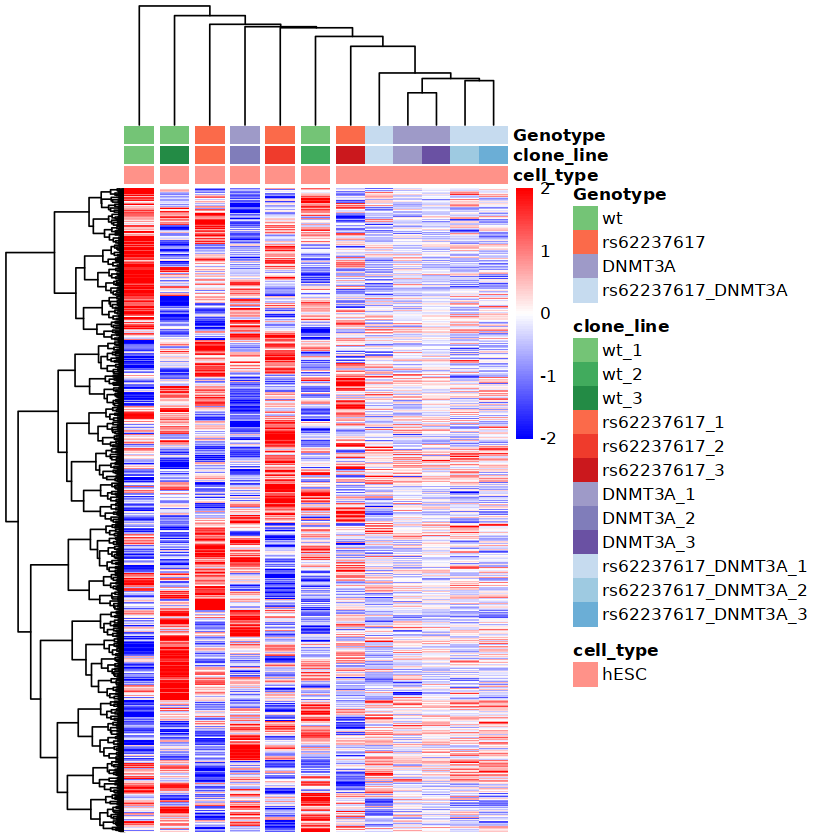

In [265]:
heatmap<-pheatmap(Peak_count_matrix, display_numbers = FALSE, number_format = "%.1e",
                    show_colnames=FALSE,
                      show_rownames=FALSE,
                    angle_col = "45",
                    clustering_method="ward.D2",
                    fontsize_row = 8, 
                    fontsize_col = 8,
                    breaks=seq(-2,2,length.out=101),
                    color=colorRampPalette(c("blue","white","red"))(100),
                    scale="row",
                    cluster_cols=TRUE,
                    border_color='black',
                    treeheight_row=70, treeheight_col=70, cutree_cols=7,
                  annotation_col = annotation_col,
                  annotation_colors = ann_colors)

In [267]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_explore_subclustering/")


svgname<-paste(paste("Heatmap_Linked_peaks",cell_type_sel, time_point_sel, sep='_'),".svg",sep='')


ggsave(svgname,plot=heatmap, device ='svg', height =13, width =13)


# Cell count plot

### Define cell_type_sel and time_point_sel

In [268]:
cell_type_sel<-'hESC'

time_point_sel<-'Day_0'


### Subset the metadata list

In [269]:
metadata_df<-metadata_ls[[cell_type_sel]]

str(metadata_df)

'data.frame':	13 obs. of  7 variables:
 $ sample_id                                 : chr  "DNMT3A_1_Day_0" "DNMT3A_1_Day_8" "DNMT3A_2_Day_0" "DNMT3A_3_Day_0" ...
 $ refined_annotation_majority_vote_sample_id: chr  "DNMT3A_1_Day_0_clusterhESC" "DNMT3A_1_Day_8_clusterhESC" "DNMT3A_2_Day_0_clusterhESC" "DNMT3A_3_Day_0_clusterhESC" ...
 $ refined_annotation_majority_vote_id       : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ cell_count                                : int  893 1 98 2277 130 119 242 506 600 715 ...
 $ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 3 2 2 2 4 4 4 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 7 8 9 4 5 6 10 11 12 ...
 $ time_point                                : Ord.factor w/ 4 levels "Day_0"<"Day_8"<..: 1 2 1 1 1 1 1 1 1 1 ...


In [270]:
metadata_df_time_point<-droplevels(metadata_df[which(metadata_df$time_point == time_point_sel),])
metadata_df_time_point<-metadata_df_time_point[order(metadata_df_time_point$clone_line),]

str(metadata_df_time_point)
cat("\n")

'data.frame':	12 obs. of  7 variables:
 $ sample_id                                 : chr  "wt_1_Day_0" "wt_2_Day_0" "wt_3_Day_0" "rs62237617_1_Day_0" ...
 $ refined_annotation_majority_vote_sample_id: chr  "wt_1_Day_0_clusterhESC" "wt_2_Day_0_clusterhESC" "wt_3_Day_0_clusterhESC" "rs62237617_1_Day_0_clusterhESC" ...
 $ refined_annotation_majority_vote_id       : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ cell_count                                : int  60 132 80 130 119 242 893 98 2277 506 ...
 $ Genotype                                  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 1 1 1 2 2 2 3 3 3 4 ...
 $ clone_line                                : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ time_point                                : Ord.factor w/ 1 level "Day_0": 1 1 1 1 1 1 1 1 1 1 ...



## Barplot of cell counts

In [271]:
fill_colours<-c(brewer.pal(9, "Greens")[c(5,6,7)],brewer.pal(9, "Reds")[c(5,6,7)],brewer.pal(9, "Purples")[c(5,6,7)],brewer.pal(9, "Blues")[c(4,5,6)],'gray','black')

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


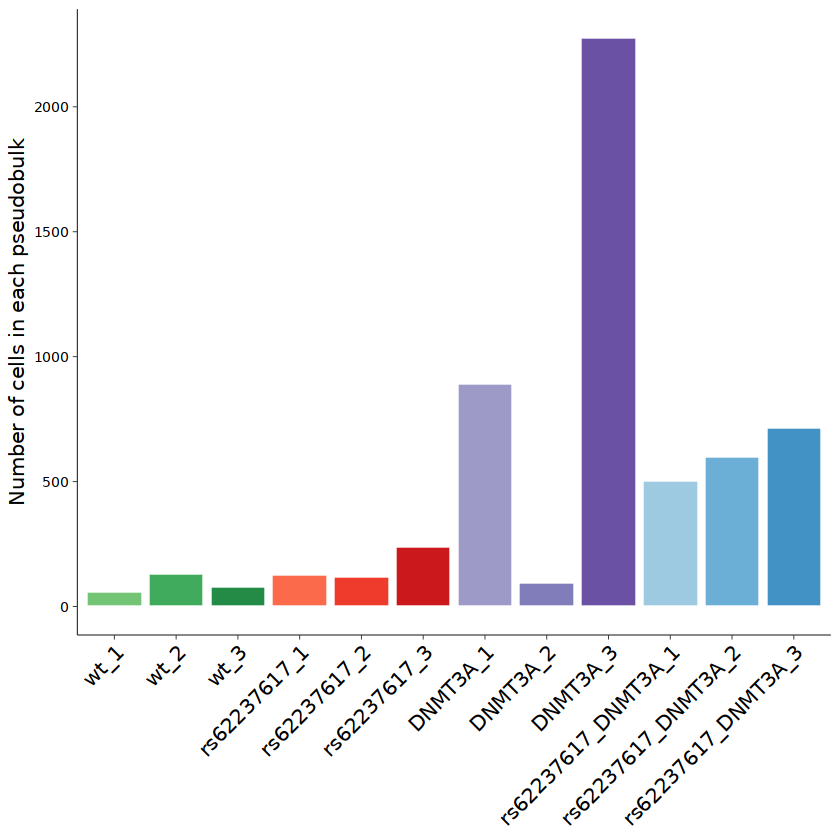

In [272]:
  barplot<-ggplot(data=metadata_df_time_point,
           aes(x=clone_line, y=cell_count,
               fill=clone_line)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Number of cells in each pseudobulk",sep=" "))+
    scale_fill_manual(values=fill_colours,
                      drop=F,
                      name="GFPbc")+
     theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=8, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=12,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="hidden")

 barplot

In [273]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_explore_subclustering/")


svgname<-paste(paste("Barplot_cell_counts_linked_peaks",cell_type_sel, time_point_sel, sep='_'),".svg",sep='')


ggsave(svgname,plot=barplot, device ='svg', height =4, width =4)


## Read ALL_peaks normalized counts

In [275]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/")

nor_counts.m<-read.table(file=paste("normalized_ALL_peaks_counts_cell_type_",cell_type_sel,"_",time_point_sel,".tsv", sep=''), sep="\t", header=T)


str(nor_counts.m)

'data.frame':	308880 obs. of  5 variables:
 $ Peak_ID   : chr  "chr1-629782-630038" "chr1-633775-634127" "chr1-778261-779284" "chr1-826625-827692" ...
 $ count     : num  208.3 1206.3 53.4 24.1 26.7 ...
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" ...
 $ time_point: chr  "Day_0" "Day_0" "Day_0" "Day_0" ...


# Heatmaps Linked_peaks_counts

## Selection of genes

In [276]:
REP<-nor_counts.m

str(REP)

'data.frame':	308880 obs. of  5 variables:
 $ Peak_ID   : chr  "chr1-629782-630038" "chr1-633775-634127" "chr1-778261-779284" "chr1-826625-827692" ...
 $ count     : num  208.3 1206.3 53.4 24.1 26.7 ...
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" "DNMT3A_1" ...
 $ time_point: chr  "Day_0" "Day_0" "Day_0" "Day_0" ...


In [277]:
REP_wide<-as.data.frame(pivot_wider(REP, id_cols=c('Peak_ID','time_point'), 
                                    names_from=c('cell_type',"clone_line"), 
                                    values_from='count',
                                    names_sep='|'), stringsAsFactors=F)

str(REP_wide)

'data.frame':	25740 obs. of  14 variables:
 $ Peak_ID                 : chr  "chr1-629782-630038" "chr1-633775-634127" "chr1-778261-779284" "chr1-826625-827692" ...
 $ time_point              : chr  "Day_0" "Day_0" "Day_0" "Day_0" ...
 $ hESC|DNMT3A_1           : num  208.3 1206.3 53.4 24.1 26.7 ...
 $ hESC|DNMT3A_2           : num  284.9 1344.2 69.9 10.4 15.5 ...
 $ hESC|DNMT3A_3           : num  223.9 1198.1 53.3 23.4 27.1 ...
 $ hESC|rs62237617_1       : num  239.6 1254.1 60.5 24.6 17.9 ...
 $ hESC|rs62237617_2       : num  198.3 1211.6 48.4 36.3 19.3 ...
 $ hESC|rs62237617_3       : num  269 1268.1 79.3 20.4 32.4 ...
 $ hESC|rs62237617_DNMT3A_1: num  236.5 1195.5 53.9 24.4 32.4 ...
 $ hESC|rs62237617_DNMT3A_2: num  219.2 1180.3 63.9 24.3 31.1 ...
 $ hESC|rs62237617_DNMT3A_3: num  233 1186 64.3 26.7 28.7 ...
 $ hESC|wt_1               : num  174 1039.6 55.2 12.7 29.7 ...
 $ hESC|wt_2               : num  305.3 1266 60.7 25.4 25.4 ...
 $ hESC|wt_3               : num  228.9 1005.3 68

In [278]:
Peak_count_matrix<-as.matrix(REP_wide[,-which(colnames(REP_wide)%in%c('Peak_ID','time_point'))])

row.names(Peak_count_matrix)<-REP_wide$Peak_ID

str(Peak_count_matrix)

 num [1:25740, 1:12] 208.3 1206.3 53.4 24.1 26.7 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:25740] "chr1-629782-630038" "chr1-633775-634127" "chr1-778261-779284" "chr1-826625-827692" ...
  ..$ : chr [1:12] "hESC|DNMT3A_1" "hESC|DNMT3A_2" "hESC|DNMT3A_3" "hESC|rs62237617_1" ...


## Annotation of columns

In [279]:
  
  annotation_col<- data.frame(matrix(vector(), length(colnames(Peak_count_matrix)), 2,
                                     dimnames=list(c(),
                                                   c("cell_type","clone_line"))),stringsAsFactors=F)
  
  row.names(annotation_col)<-colnames(Peak_count_matrix)
  
  
  cat("annotation_col_0\n")
  cat(str(annotation_col))
  cat("\n")
  #cat(sprintf(as.character(row.names(annotation_col))))
  #cat("\n")

annotation_col$cell_type<-gsub("\\|.+$","", row.names(annotation_col))
annotation_col$clone_line<-gsub("^[^\\|]+\\|","", row.names(annotation_col))

 cat("annotation_col_1\n")
  cat(str(annotation_col))
  cat("\n")

annotation_col$Genotype<-NA
  
  annotation_col$Genotype[which(annotation_col$clone_line%in%c('wt_1','wt_2','wt_3'))]<-'wt'
  annotation_col$Genotype[which(annotation_col$clone_line%in%c('rs62237617_1','rs62237617_2','rs62237617_3'))]<-'rs62237617'
  annotation_col$Genotype[which(annotation_col$clone_line%in%c('DNMT3A_1','DNMT3A_2','DNMT3A_3'))]<-'DNMT3A'
  annotation_col$Genotype[which(annotation_col$clone_line%in%c('rs62237617_DNMT3A_1','rs62237617_DNMT3A_2','rs62237617_DNMT3A_3'))]<-'rs62237617_DNMT3A'


cat("annotation_col_PRE\n")
  cat(str(annotation_col))
  cat("\n")
names(summary(as.factor(annotation_col$Genotype)))
  cat("\n")
names(summary(as.factor(annotation_col$clone_line)))
  cat("\n")
names(summary(as.factor(annotation_col$cell_type)))
  cat("\n")

annotation_col$Genotype<-factor(annotation_col$Genotype,
                                                    levels=levels(adata@meta.data$Genotype),
                                                    ordered=T)

annotation_col$clone_line<-droplevels(factor(annotation_col$clone_line,
                                                    levels=levels(adata@meta.data$clone_line),
                                                    ordered=T))

annotation_col$cell_type<-droplevels(factor(annotation_col$cell_type,
                                                    levels=levels(adata@meta.data$refined_annotation_majority_vote),
                                                    ordered=T))

cat("annotation_col_POST\n")
  cat(str(annotation_col))
  cat("\n")
names(summary(as.factor(annotation_col$Genotype)))
  cat("\n")
names(summary(as.factor(annotation_col$clone_line)))
  cat("\n")
names(summary(as.factor(annotation_col$cell_type)))
  cat("\n")

annotation_col_0
'data.frame':	12 obs. of  2 variables:
 $ cell_type : logi  NA NA NA NA NA NA ...
 $ clone_line: logi  NA NA NA NA NA NA ...

annotation_col_1
'data.frame':	12 obs. of  2 variables:
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_2" "DNMT3A_3" "rs62237617_1" ...

annotation_col_PRE
'data.frame':	12 obs. of  3 variables:
 $ cell_type : chr  "hESC" "hESC" "hESC" "hESC" ...
 $ clone_line: chr  "DNMT3A_1" "DNMT3A_2" "DNMT3A_3" "rs62237617_1" ...
 $ Genotype  : chr  "DNMT3A" "DNMT3A" "DNMT3A" "rs62237617" ...



[1] "DNMT3A"            "rs62237617"        "rs62237617_DNMT3A"
[4] "wt"

[1] "DNMT3A_1"            "DNMT3A_2"            "DNMT3A_3"           
 [4] "rs62237617_1"        "rs62237617_2"        "rs62237617_3"       
 [7] "rs62237617_DNMT3A_1" "rs62237617_DNMT3A_2" "rs62237617_DNMT3A_3"
[10] "wt_1"                "wt_2"                "wt_3"

[1] "hESC"


annotation_col_POST
'data.frame':	12 obs. of  3 variables:
 $ cell_type : Ord.factor w/ 1 level "hESC": 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line: Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 7 8 9 4 5 6 10 11 12 1 ...
 $ Genotype  : Ord.factor w/ 4 levels "wt"<"rs62237617"<..: 3 3 3 2 2 2 4 4 4 1 ...



[1] "wt"                "rs62237617"        "DNMT3A"           
[4] "rs62237617_DNMT3A"

[1] "wt_1"                "wt_2"                "wt_3"               
 [4] "rs62237617_1"        "rs62237617_2"        "rs62237617_3"       
 [7] "DNMT3A_1"            "DNMT3A_2"            "DNMT3A_3"           
[10] "rs62237617_DNMT3A_1" "rs62237617_DNMT3A_2" "rs62237617_DNMT3A_3"

[1] "hESC"

## Annotation of colors

In [280]:
 
ann_colors <- list( clone_line = c('wt_1' = brewer.pal(9, "Greens")[c(5)],
                                  'wt_2' = brewer.pal(9, "Greens")[c(6)],
                                  'wt_3' = brewer.pal(9, "Greens")[c(7)],
                                   'rs62237617_1' = brewer.pal(9, "Reds")[c(5)],
                                    'rs62237617_2' = brewer.pal(9, "Reds")[c(6)],
                                   'rs62237617_3' = brewer.pal(9, "Reds")[c(7)],
                                   'DNMT3A_1' = brewer.pal(9, "Purples")[c(5)],
                                   'DNMT3A_2' = brewer.pal(9, "Purples")[c(6)],
                                   'DNMT3A_3' = brewer.pal(9, "Purples")[c(7)],
                                   'rs62237617_DNMT3A_1' = brewer.pal(9, "Blues")[c(3)],
                                    'rs62237617_DNMT3A_2' = brewer.pal(9, "Blues")[c(4)],
                                   'rs62237617_DNMT3A_3' = brewer.pal(9, "Blues")[c(5)]),
                   Genotype = c('wt' = brewer.pal(9, "Greens")[c(5)],
                                                    'rs62237617' = brewer.pal(9, "Reds")[c(5)],
                                                    'DNMT3A' = brewer.pal(9, "Purples")[c(5)],
                                                    'rs62237617_DNMT3A' = brewer.pal(9, "Blues")[c(3)]),
                   cluster = c('1' = brewer.pal(6, "Dark2")[c(1)],
                                 '2' = brewer.pal(6, "Dark2")[c(2)],
                                   '3' = brewer.pal(6, "Dark2")[c(3)],
                                    '4' = brewer.pal(6, "Dark2")[c(4)],
                                    '5' = brewer.pal(6, "Dark2")[c(5)],
                                    '6' = brewer.pal(6, "Dark2")[c(6)])                 
                                   
                  )


str(ann_colors)

List of 3
 $ clone_line: Named chr [1:12] "#74C476" "#41AB5D" "#238B45" "#FB6A4A" ...
  ..- attr(*, "names")= chr [1:12] "wt_1" "wt_2" "wt_3" "rs62237617_1" ...
 $ Genotype  : Named chr [1:4] "#74C476" "#FB6A4A" "#9E9AC8" "#C6DBEF"
  ..- attr(*, "names")= chr [1:4] "wt" "rs62237617" "DNMT3A" "rs62237617_DNMT3A"
 $ cluster   : Named chr [1:6] "#1B9E77" "#D95F02" "#7570B3" "#E7298A" ...
  ..- attr(*, "names")= chr [1:6] "1" "2" "3" "4" ...


## graph

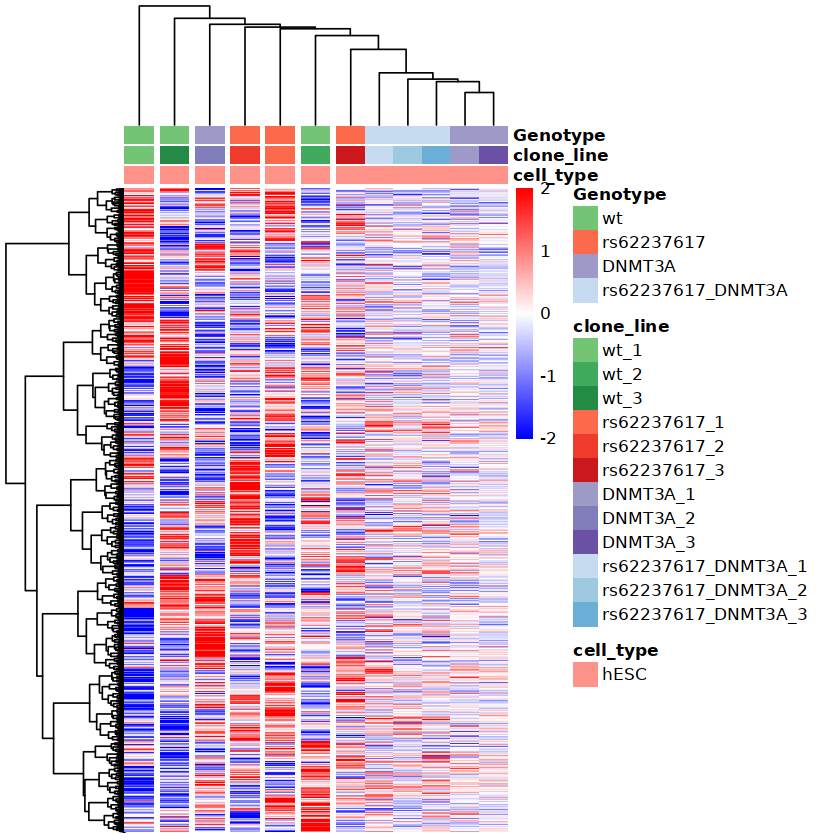

In [281]:
heatmap<-pheatmap(Peak_count_matrix, display_numbers = FALSE, number_format = "%.1e",
                    show_colnames=FALSE,
                      show_rownames=FALSE,
                    angle_col = "45",
                    clustering_method="ward.D2",
                    fontsize_row = 8, 
                    fontsize_col = 8,
                    breaks=seq(-2,2,length.out=101),
                    color=colorRampPalette(c("blue","white","red"))(100),
                    scale="row",
                    cluster_cols=TRUE,
                    border_color='black',
                    treeheight_row=70, treeheight_col=70, cutree_cols=7,
                  annotation_col = annotation_col,
                  annotation_colors = ann_colors)

In [282]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Downstream_analysis_cluster_after_genotyping/graphs_explore_subclustering/")


svgname<-paste(paste("Heatmap_ALL_peaks",cell_type_sel, time_point_sel, sep='_'),".svg",sep='')


ggsave(svgname,plot=heatmap, device ='svg', height =13, width =13)
